# Exploratory Data Analysis: Open University Learning Analytics Dataset (OULAD)

This notebook provides a comprehensive exploratory data analysis of the Open University Learning Analytics Dataset (OULAD), which contains data about courses, students, and their interactions with the Virtual Learning Environment (VLE).

## Dataset Overview
The dataset contains information about:
- **7 modules** (AAA, BBB, CCC, DDD, EEE, FFF, GGG)
- **22 course presentations** (2013B, 2013J, 2014B, 2014J)
- **32,953 students** across all courses
- **6,364 VLE pages** with various activity types
- **10.6M+ VLE interaction logs** (student clicks)
- **206 assessments** (TMA, CMA, Exam)
- **173,912 assessment submissions**

## Key Files
- `courses.csv` - Module and presentation metadata
- `assessments.csv` - Assessment details and schedules
- `studentInfo.csv` - Student demographics and final results (target variable)
- `studentRegistration.csv` - Registration/unregistration dates
- `studentAssessment.csv` - Assessment scores and submissions
- `vle.csv` - VLE material information
- `studentVle_split/` - Student-VLE interaction logs (split into 6 parts)

## Target Variable
**`final_result`** in `studentInfo.csv`: 
- Distinction
- Pass
- Fail
- Withdrawn


In [1]:
# Install required packages
!pip install -q pandas numpy matplotlib seaborn plotly



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from pathlib import Path
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('ggplot')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 10

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")


Libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 1.26.4
Matplotlib version: 3.10.1
Seaborn version: 0.13.2


## 1. Data Loading and Initial Inspection


In [3]:
# Find dataset path
possible_paths = [
    '../../datasets/open-university-learning-analytics-dataset/',  # From pretests/charaka/
    'datasets/open-university-learning-analytics-dataset/',        # From project root
    '../datasets/open-university-learning-analytics-dataset/'      # From pretests/
]

dataset_path = None
for path in possible_paths:
    if os.path.exists(path):
        dataset_path = path
        break

if dataset_path is None:
    raise FileNotFoundError(f"Could not find dataset. Tried: {possible_paths}")

print(f"Dataset path: {os.path.abspath(dataset_path)}")
print("\n" + "=" * 80)
print("LOADING DATASET FILES")
print("=" * 80)


Dataset path: /Users/charaka/Desktop/Projects/uom-student-performance-analytics/datasets/open-university-learning-analytics-dataset

LOADING DATASET FILES


In [4]:
# Load all CSV files
# Replace '?' with NaN for missing values
def load_csv_with_nan(filepath):
    """Load CSV and replace '?' with NaN"""
    df = pd.read_csv(filepath, na_values=['?'])
    return df

# Load main files
courses_df = load_csv_with_nan(os.path.join(dataset_path, 'courses.csv'))
assessments_df = load_csv_with_nan(os.path.join(dataset_path, 'assessments.csv'))
student_info_df = load_csv_with_nan(os.path.join(dataset_path, 'studentInfo.csv'))
student_reg_df = load_csv_with_nan(os.path.join(dataset_path, 'studentRegistration.csv'))
student_assess_df = load_csv_with_nan(os.path.join(dataset_path, 'studentAssessment.csv'))
vle_df = load_csv_with_nan(os.path.join(dataset_path, 'vle.csv'))

# Load studentVle files (split into 6 parts)
print("Loading studentVle files (this may take a moment)...")
student_vle_parts = []
for i in range(1, 7):
    part_path = os.path.join(dataset_path, 'studentVle_split', f'studentVle_part{i}.csv')
    if os.path.exists(part_path):
        part_df = load_csv_with_nan(part_path)
        student_vle_parts.append(part_df)
        print(f"  Loaded part {i}: {len(part_df):,} rows")

# Combine all studentVle parts
if student_vle_parts:
    student_vle_df = pd.concat(student_vle_parts, ignore_index=True)
    print(f"\nCombined studentVle: {len(student_vle_df):,} rows")
else:
    student_vle_df = pd.DataFrame()
    print("Warning: No studentVle files found")

print("\n" + "=" * 80)
print("DATASET SUMMARY")
print("=" * 80)
datasets = {
    'courses': courses_df,
    'assessments': assessments_df,
    'studentInfo': student_info_df,
    'studentRegistration': student_reg_df,
    'studentAssessment': student_assess_df,
    'vle': vle_df,
    'studentVle': student_vle_df
}

for name, df in datasets.items():
    print(f"{name:25s}: {df.shape[0]:>10,} rows × {df.shape[1]:>3} columns")


Loading studentVle files (this may take a moment)...
  Loaded part 1: 2,000,000 rows
  Loaded part 2: 2,000,000 rows
  Loaded part 3: 2,000,000 rows
  Loaded part 4: 2,000,000 rows
  Loaded part 5: 2,000,000 rows
  Loaded part 6: 655,280 rows

Combined studentVle: 10,655,280 rows

DATASET SUMMARY
courses                  :         22 rows ×   3 columns
assessments              :        206 rows ×   6 columns
studentInfo              :     32,593 rows ×  12 columns
studentRegistration      :     32,593 rows ×   5 columns
studentAssessment        :    173,912 rows ×   5 columns
vle                      :      6,364 rows ×   6 columns
studentVle               : 10,655,280 rows ×   6 columns


In [5]:
# Display first few rows of each dataset
print("=" * 80)
print("PREVIEW OF EACH DATASET")
print("=" * 80)

for name, df in datasets.items():
    print(f"\n{name.upper()}")
    print("-" * 80)
    print(df.head(3))
    print(f"\nColumns: {list(df.columns)}")
    print()


PREVIEW OF EACH DATASET

COURSES
--------------------------------------------------------------------------------
  code_module code_presentation  module_presentation_length
0         AAA             2013J                         268
1         AAA             2014J                         269
2         BBB             2013J                         268

Columns: ['code_module', 'code_presentation', 'module_presentation_length']


ASSESSMENTS
--------------------------------------------------------------------------------
  code_module code_presentation  id_assessment assessment_type   date  weight
0         AAA             2013J           1752             TMA   19.0    10.0
1         AAA             2013J           1753             TMA   54.0    20.0
2         AAA             2013J           1754             TMA  117.0    20.0

Columns: ['code_module', 'code_presentation', 'id_assessment', 'assessment_type', 'date', 'weight']


STUDENTINFO
-----------------------------------------------

In [6]:
# Data quality checks
print("=" * 80)
print("DATA QUALITY CHECKS")
print("=" * 80)

for name, df in datasets.items():
    print(f"\n{name.upper()}")
    print("-" * 80)
    print(f"Shape: {df.shape}")
    print(f"Missing values:")
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(missing[missing > 0])
    else:
        print("  No missing values")
    print(f"Duplicate rows: {df.duplicated().sum()}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


DATA QUALITY CHECKS

COURSES
--------------------------------------------------------------------------------
Shape: (22, 3)
Missing values:
  No missing values
Duplicate rows: 0
Memory usage: 0.00 MB

ASSESSMENTS
--------------------------------------------------------------------------------
Shape: (206, 6)
Missing values:
date    11
dtype: int64
Duplicate rows: 0
Memory usage: 0.04 MB

STUDENTINFO
--------------------------------------------------------------------------------
Shape: (32593, 12)
Missing values:
imd_band    1111
dtype: int64
Duplicate rows: 0
Memory usage: 18.53 MB

STUDENTREGISTRATION
--------------------------------------------------------------------------------
Shape: (32593, 5)
Missing values:
date_registration         45
date_unregistration    22521
dtype: int64
Duplicate rows: 0
Memory usage: 4.54 MB

STUDENTASSESSMENT
--------------------------------------------------------------------------------
Shape: (173912, 5)
Missing values:
score    173
dtype: int64
D

## 2. Univariate Analysis

### 2.1 Student Demographics Analysis


FINAL RESULT DISTRIBUTION (Target Variable)
              Count  Percentage
final_result                   
Pass          12361       37.93
Withdrawn     10156       31.16
Fail           7052       21.64
Distinction    3024        9.28

Total students: 32,593


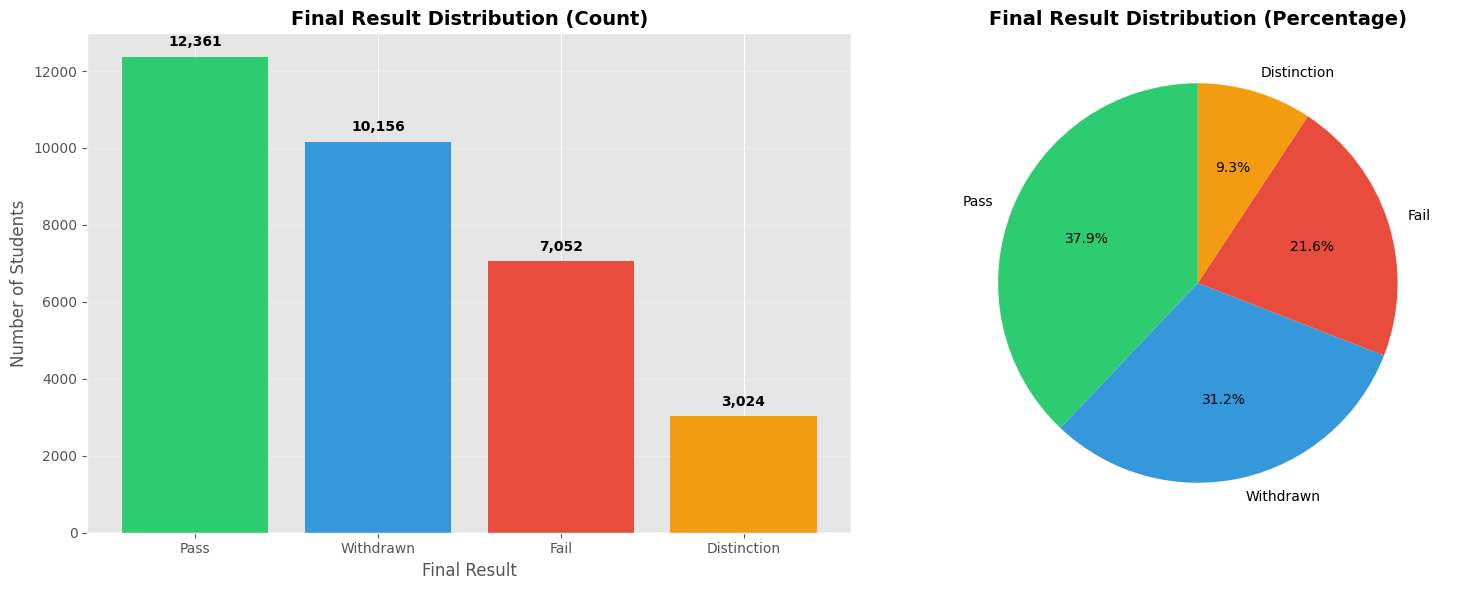

In [7]:
# Target variable distribution
print("=" * 80)
print("FINAL RESULT DISTRIBUTION (Target Variable)")
print("=" * 80)
result_counts = student_info_df['final_result'].value_counts()
result_pct = student_info_df['final_result'].value_counts(normalize=True) * 100

result_summary = pd.DataFrame({
    'Count': result_counts,
    'Percentage': result_pct
}).round(2)

print(result_summary)
print(f"\nTotal students: {len(student_info_df):,}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
axes[0].bar(result_summary.index, result_summary['Count'], color=['#2ecc71', '#3498db', '#e74c3c', '#f39c12'])
axes[0].set_title('Final Result Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Final Result', fontsize=12)
axes[0].set_ylabel('Number of Students', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(result_summary['Count']):
    axes[0].text(i, v + 200, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Pie chart
axes[1].pie(result_summary['Count'], labels=result_summary.index, autopct='%1.1f%%', 
            startangle=90, colors=['#2ecc71', '#3498db', '#e74c3c', '#f39c12'])
axes[1].set_title('Final Result Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


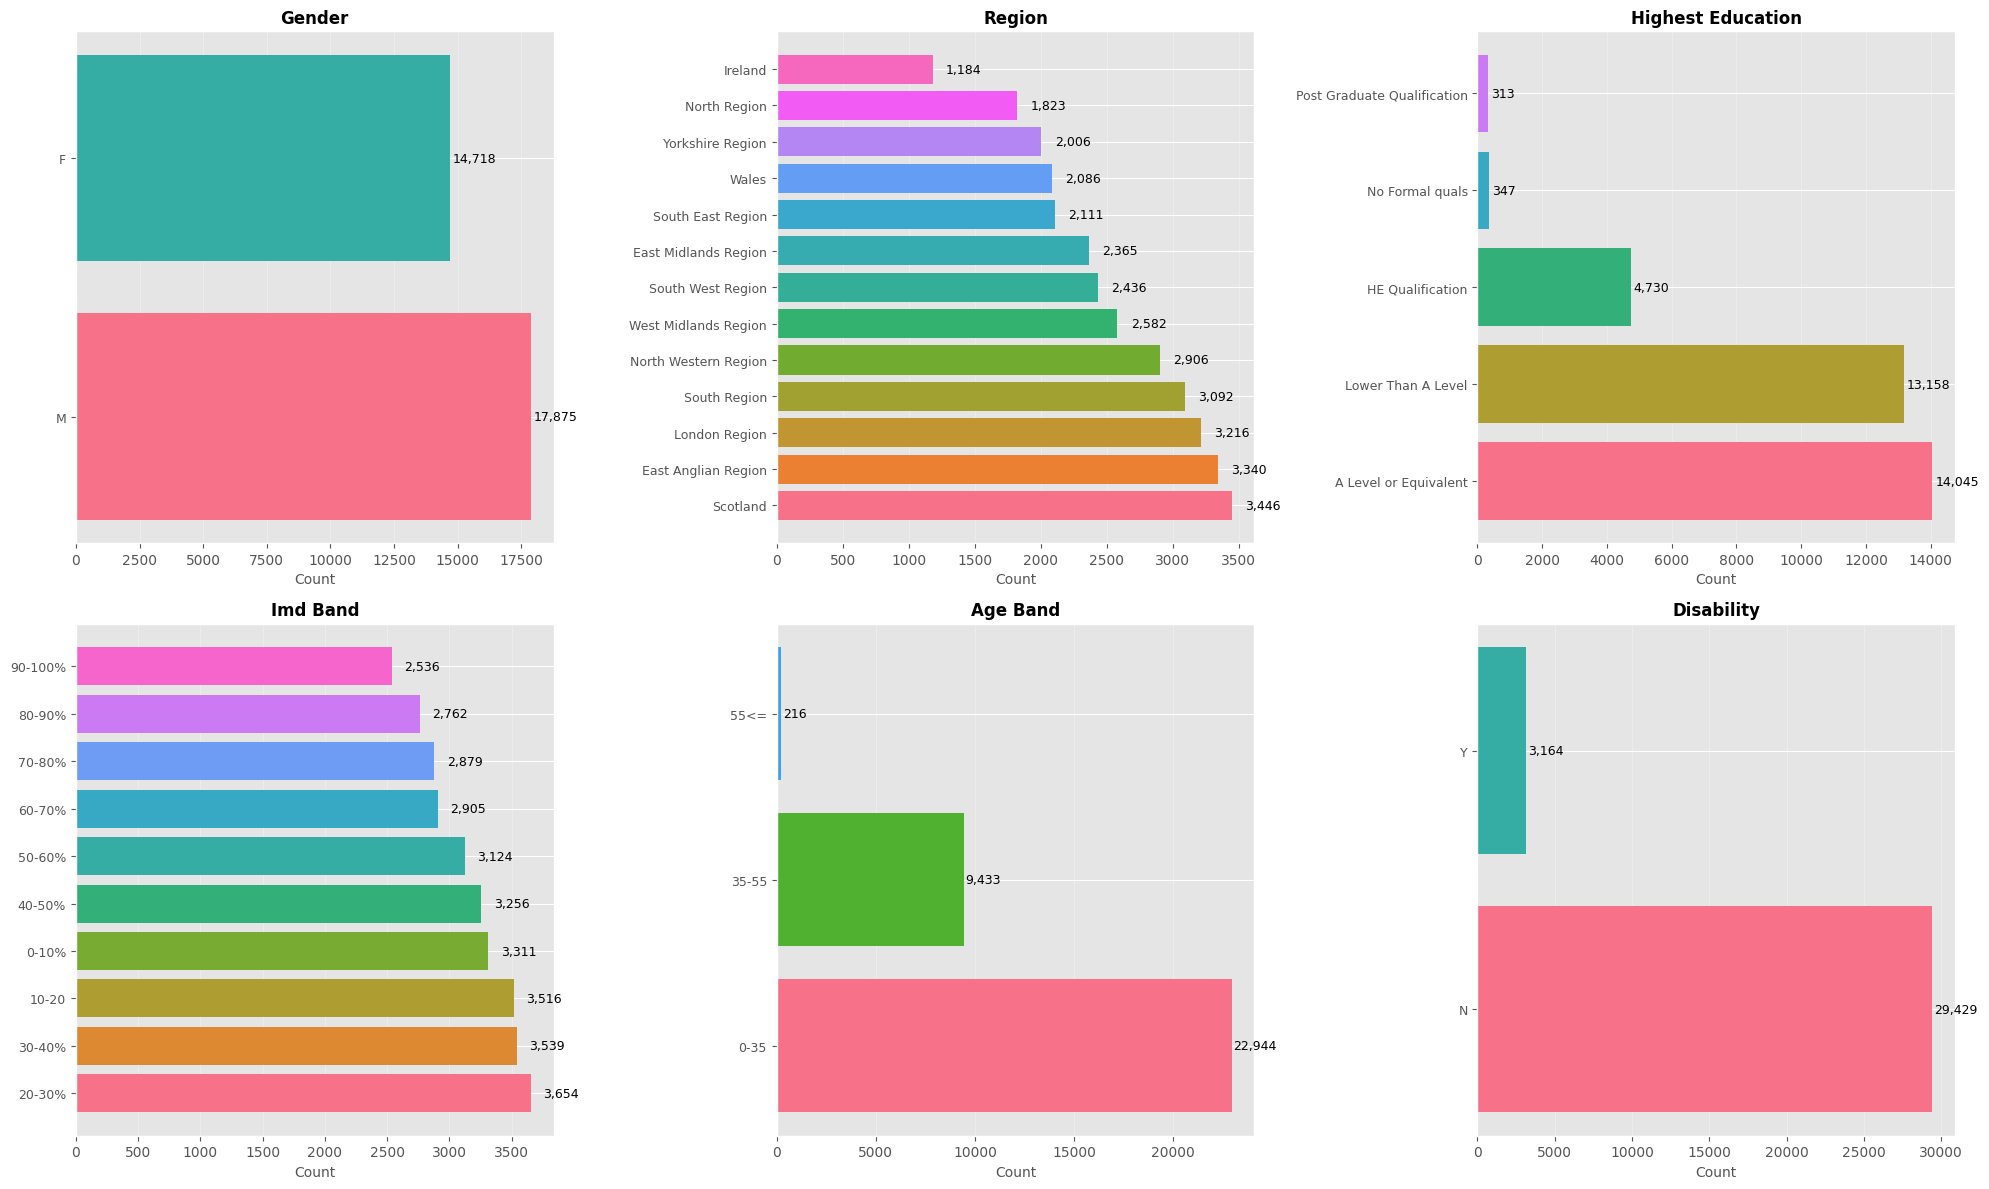


DEMOGRAPHIC SUMMARY STATISTICS

Gender:
gender
M    17875
F    14718
Name: count, dtype: int64

Region:
region
Scotland                3446
East Anglian Region     3340
London Region           3216
South Region            3092
North Western Region    2906
West Midlands Region    2582
South West Region       2436
East Midlands Region    2365
South East Region       2111
Wales                   2086
Name: count, dtype: int64

Highest Education:
highest_education
A Level or Equivalent          14045
Lower Than A Level             13158
HE Qualification                4730
No Formal quals                  347
Post Graduate Qualification      313
Name: count, dtype: int64

Imd Band:
imd_band
20-30%     3654
30-40%     3539
10-20      3516
0-10%      3311
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    2536
Name: count, dtype: int64

Age Band:
age_band
0-35     22944
35-55     9433
55<=       216
Name: count, dtype: int64

Disability:
disability
N 

In [8]:
# Demographic distributions
demographic_cols = ['gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for idx, col in enumerate(demographic_cols):
    if col in student_info_df.columns:
        counts = student_info_df[col].value_counts()
        axes[idx].barh(range(len(counts)), counts.values, color=sns.color_palette("husl", len(counts)))
        axes[idx].set_yticks(range(len(counts)))
        axes[idx].set_yticklabels(counts.index, fontsize=9)
        axes[idx].set_xlabel('Count', fontsize=10)
        axes[idx].set_title(f'{col.replace("_", " ").title()}', fontsize=12, fontweight='bold')
        axes[idx].grid(axis='x', alpha=0.3)
        
        # Add count labels
        for i, v in enumerate(counts.values):
            axes[idx].text(v + 100, i, f'{v:,}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "=" * 80)
print("DEMOGRAPHIC SUMMARY STATISTICS")
print("=" * 80)
for col in demographic_cols:
    if col in student_info_df.columns:
        print(f"\n{col.replace('_', ' ').title()}:")
        print(student_info_df[col].value_counts().head(10))


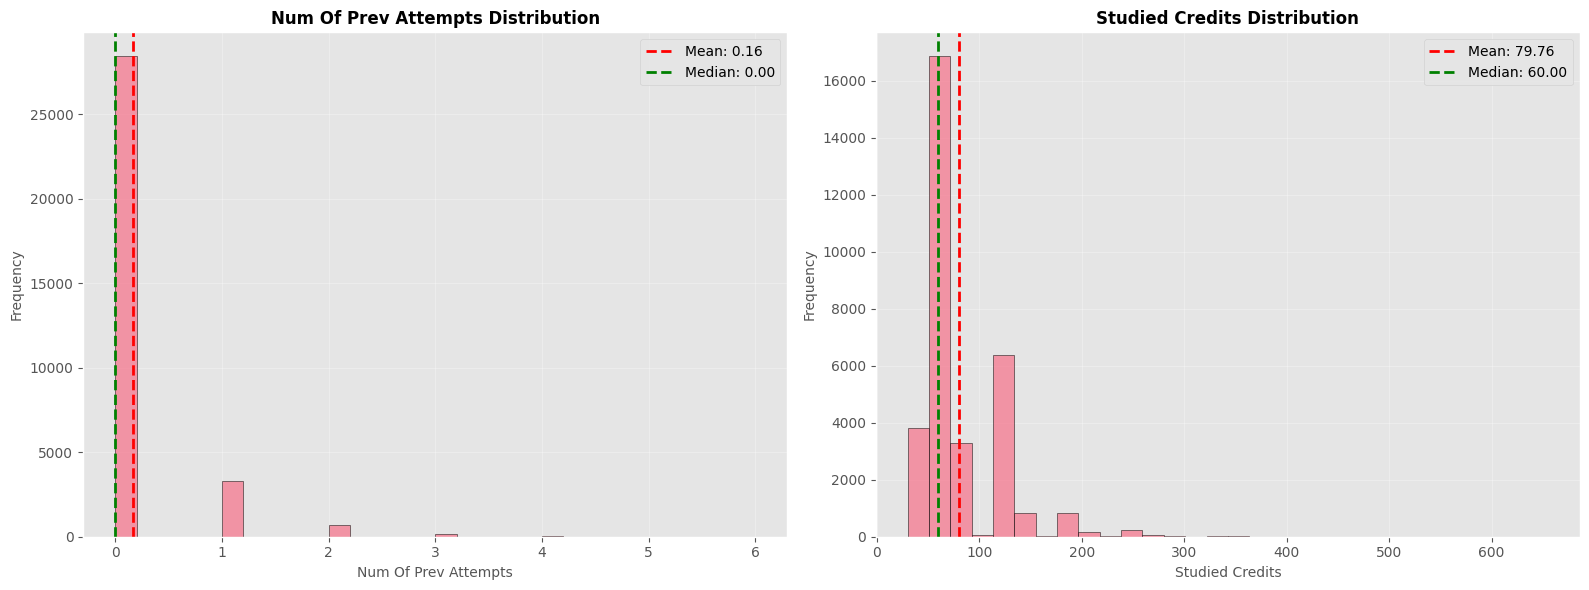


NUMERIC VARIABLES SUMMARY
       num_of_prev_attempts  studied_credits
count          32593.000000     32593.000000
mean               0.163225        79.758691
std                0.479758        41.071900
min                0.000000        30.000000
25%                0.000000        60.000000
50%                0.000000        60.000000
75%                0.000000       120.000000
max                6.000000       655.000000


In [9]:
# Numeric variables analysis
numeric_cols = ['num_of_prev_attempts', 'studied_credits']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for idx, col in enumerate(numeric_cols):
    if col in student_info_df.columns:
        # Histogram
        axes[idx].hist(student_info_df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'{col.replace("_", " ").title()} Distribution', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col.replace('_', ' ').title(), fontsize=10)
        axes[idx].set_ylabel('Frequency', fontsize=10)
        axes[idx].grid(alpha=0.3)
        
        # Add statistics
        mean_val = student_info_df[col].mean()
        median_val = student_info_df[col].median()
        axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
        axes[idx].legend()

plt.tight_layout()
plt.show()

# Summary statistics
print("\n" + "=" * 80)
print("NUMERIC VARIABLES SUMMARY")
print("=" * 80)
print(student_info_df[numeric_cols].describe())


### 2.2 Course and Module Analysis


COURSE AND MODULE ANALYSIS

Module Distribution:
code_module
BBB    4
DDD    4
FFF    4
EEE    3
GGG    3
AAA    2
CCC    2
Name: count, dtype: int64

Presentation Distribution:
code_presentation
2014J    7
2013J    6
2014B    6
2013B    3
Name: count, dtype: int64

Course Length Statistics:
count     22.000000
mean     255.545455
std       13.654677
min      234.000000
25%      241.000000
50%      261.500000
75%      268.000000
max      269.000000
Name: module_presentation_length, dtype: float64


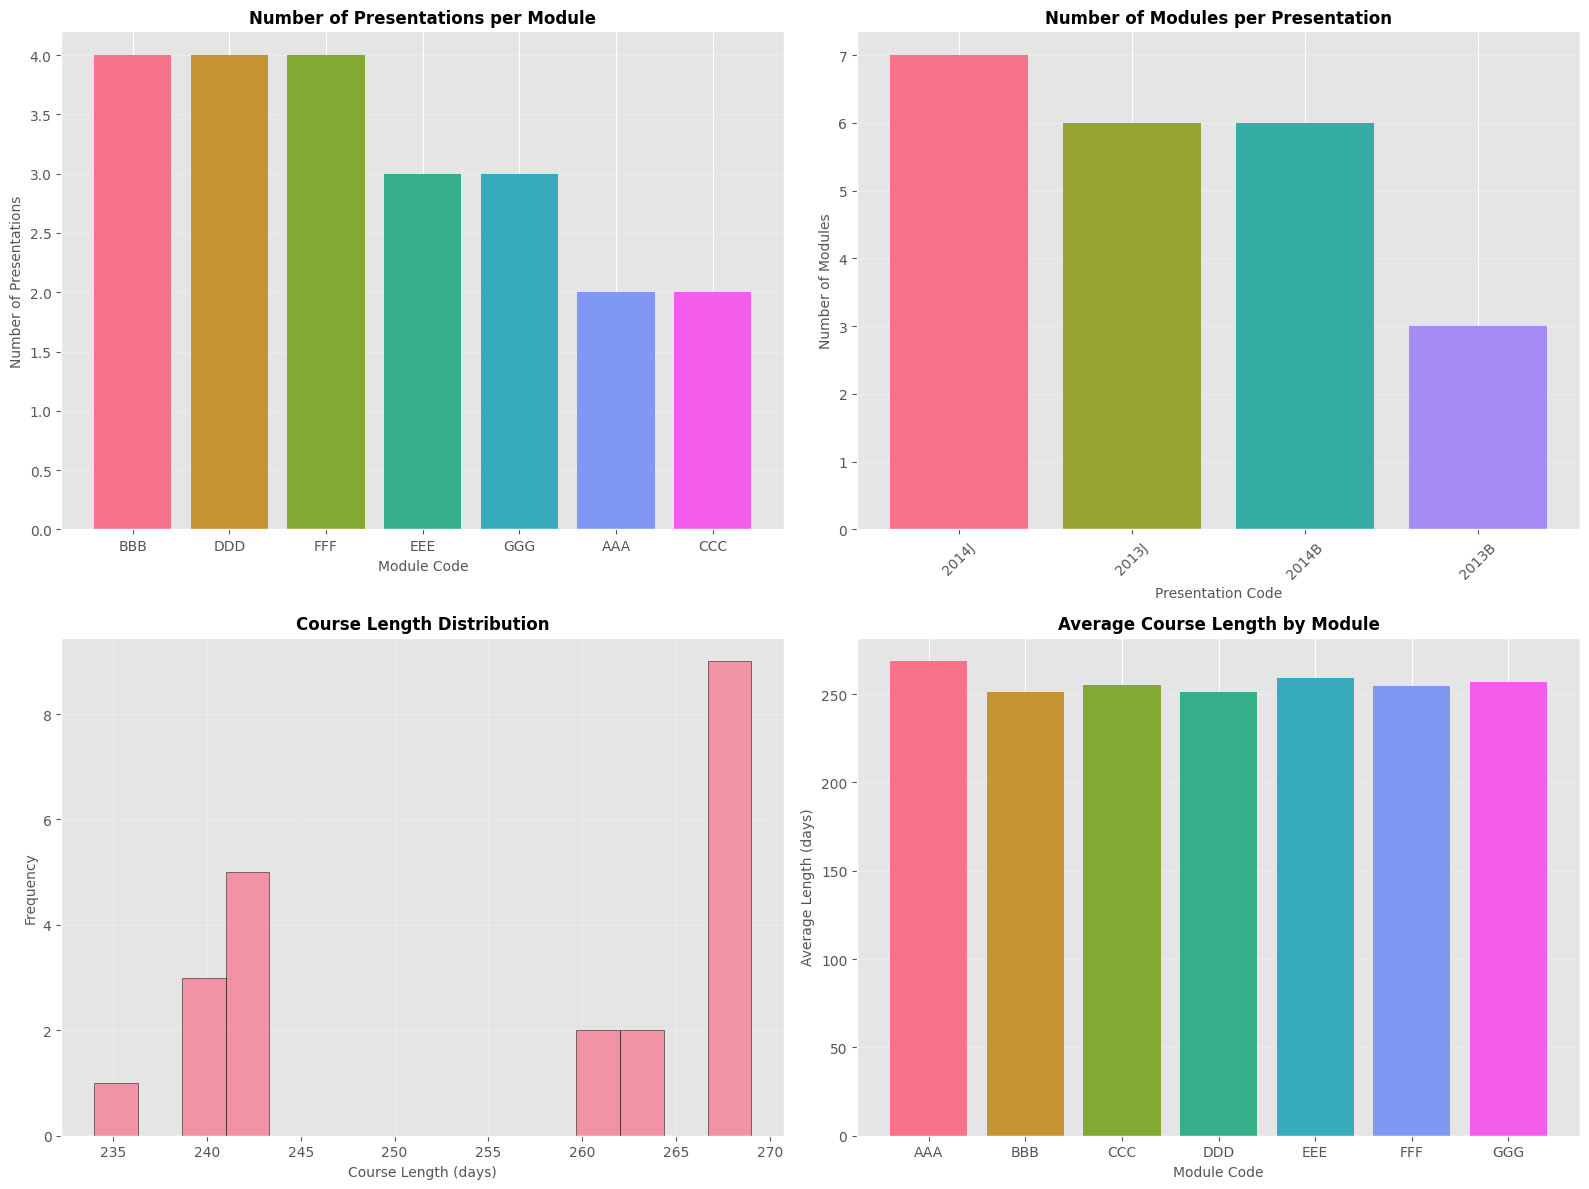

In [10]:
# Course and module analysis
print("=" * 80)
print("COURSE AND MODULE ANALYSIS")
print("=" * 80)

# Module distribution
print("\nModule Distribution:")
module_counts = courses_df['code_module'].value_counts()
print(module_counts)

# Presentation distribution
print("\nPresentation Distribution:")
presentation_counts = courses_df['code_presentation'].value_counts()
print(presentation_counts)

# Course length analysis
print("\nCourse Length Statistics:")
print(courses_df['module_presentation_length'].describe())

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Module distribution
axes[0, 0].bar(module_counts.index, module_counts.values, color=sns.color_palette("husl", len(module_counts)))
axes[0, 0].set_title('Number of Presentations per Module', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Module Code', fontsize=10)
axes[0, 0].set_ylabel('Number of Presentations', fontsize=10)
axes[0, 0].grid(axis='y', alpha=0.3)

# Presentation distribution
axes[0, 1].bar(presentation_counts.index, presentation_counts.values, color=sns.color_palette("husl", len(presentation_counts)))
axes[0, 1].set_title('Number of Modules per Presentation', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Presentation Code', fontsize=10)
axes[0, 1].set_ylabel('Number of Modules', fontsize=10)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# Course length distribution
axes[1, 0].hist(courses_df['module_presentation_length'], bins=15, edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Course Length Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Course Length (days)', fontsize=10)
axes[1, 0].set_ylabel('Frequency', fontsize=10)
axes[1, 0].grid(alpha=0.3)

# Module vs Course Length
module_lengths = courses_df.groupby('code_module')['module_presentation_length'].mean()
axes[1, 1].bar(module_lengths.index, module_lengths.values, color=sns.color_palette("husl", len(module_lengths)))
axes[1, 1].set_title('Average Course Length by Module', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Module Code', fontsize=10)
axes[1, 1].set_ylabel('Average Length (days)', fontsize=10)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### 2.3 Assessment Analysis


ASSESSMENT ANALYSIS

Assessment Types Distribution:
assessment_type
TMA     106
CMA      76
Exam     24
Name: count, dtype: int64

Assessment Weight Statistics:
count    206.000000
mean      20.873786
std       30.384224
min        0.000000
25%        0.000000
50%       12.500000
75%       24.250000
max      100.000000
Name: weight, dtype: float64

Assessments per Module:
code_module
AAA    12
BBB    42
CCC    20
DDD    35
EEE    15
FFF    52
GGG    30
dtype: int64


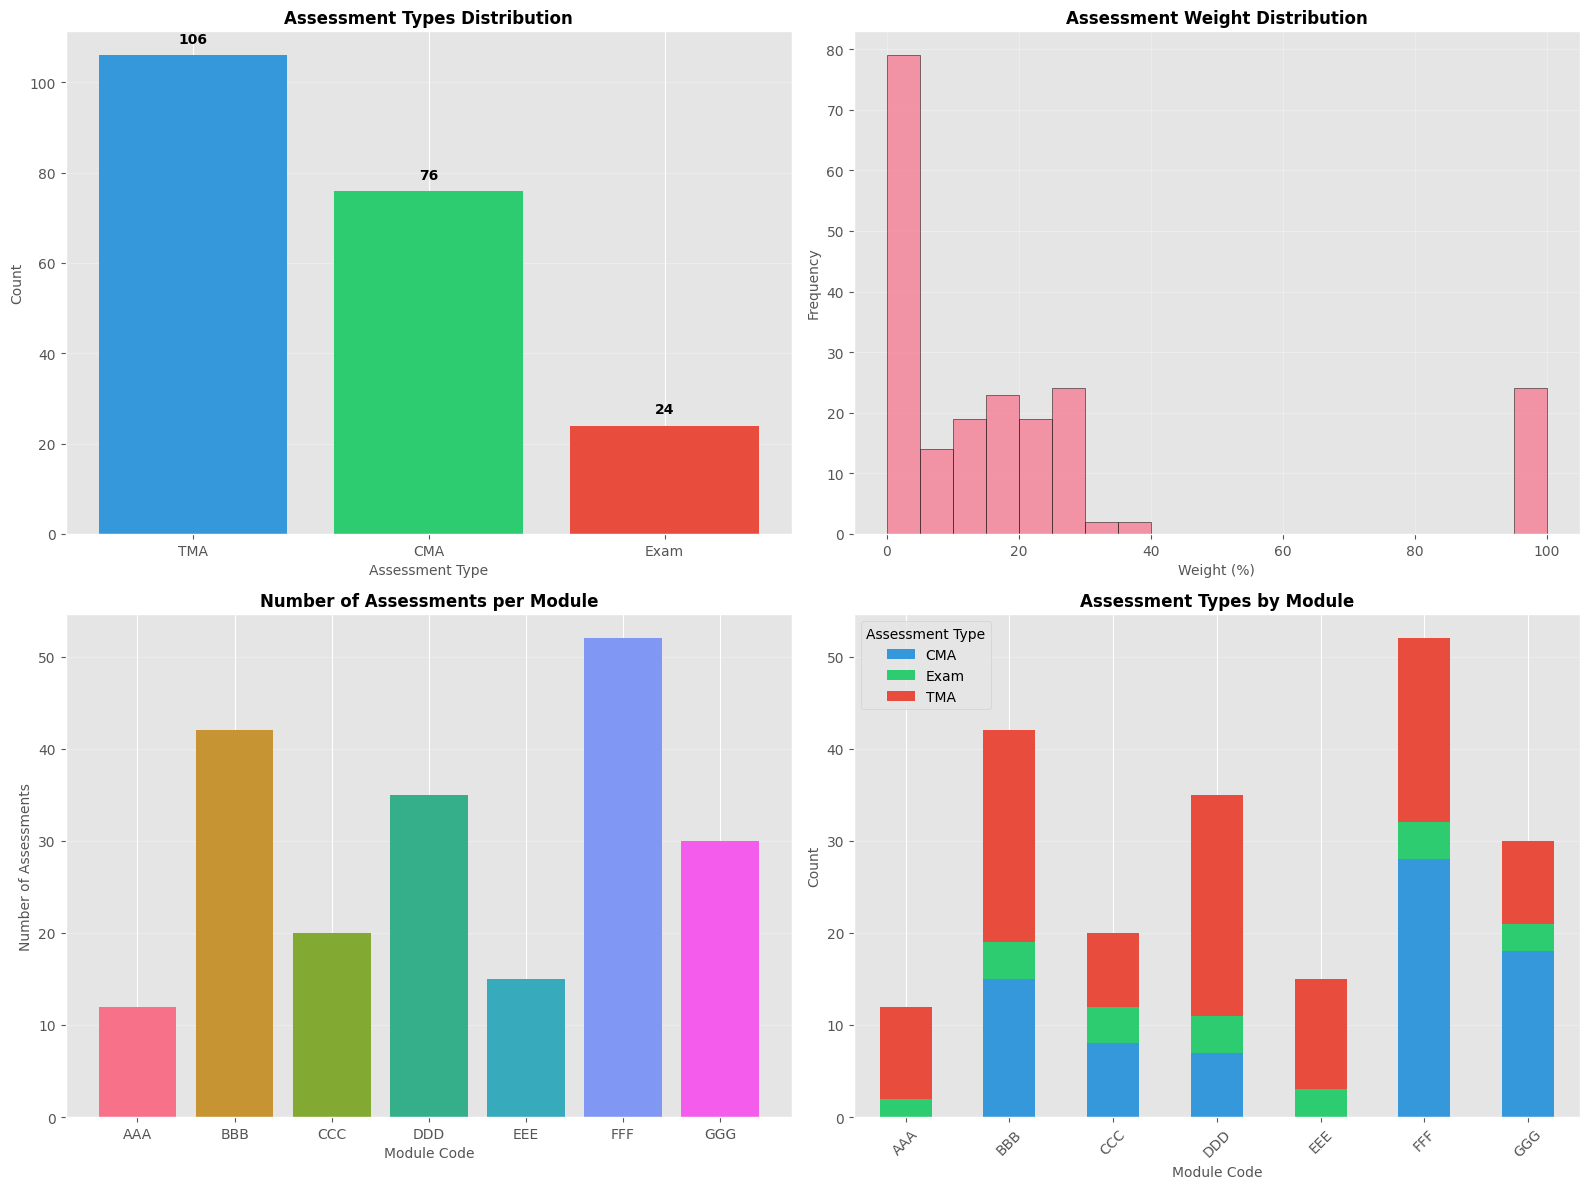

In [11]:
# Assessment analysis
print("=" * 80)
print("ASSESSMENT ANALYSIS")
print("=" * 80)

# Assessment types
print("\nAssessment Types Distribution:")
assess_type_counts = assessments_df['assessment_type'].value_counts()
print(assess_type_counts)

# Weight distribution
print("\nAssessment Weight Statistics:")
print(assessments_df['weight'].describe())

# Assessments per module
assess_per_module = assessments_df.groupby('code_module').size()
print("\nAssessments per Module:")
print(assess_per_module)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Assessment types
axes[0, 0].bar(assess_type_counts.index, assess_type_counts.values, 
               color=['#3498db', '#2ecc71', '#e74c3c'])
axes[0, 0].set_title('Assessment Types Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Assessment Type', fontsize=10)
axes[0, 0].set_ylabel('Count', fontsize=10)
axes[0, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(assess_type_counts.values):
    axes[0, 0].text(i, v + 2, f'{v}', ha='center', va='bottom', fontweight='bold')

# Weight distribution
axes[0, 1].hist(assessments_df['weight'].dropna(), bins=20, edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Assessment Weight Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Weight (%)', fontsize=10)
axes[0, 1].set_ylabel('Frequency', fontsize=10)
axes[0, 1].grid(alpha=0.3)

# Assessments per module
axes[1, 0].bar(assess_per_module.index, assess_per_module.values, 
               color=sns.color_palette("husl", len(assess_per_module)))
axes[1, 0].set_title('Number of Assessments per Module', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Module Code', fontsize=10)
axes[1, 0].set_ylabel('Number of Assessments', fontsize=10)
axes[1, 0].grid(axis='y', alpha=0.3)

# Assessment type by module
assess_type_module = pd.crosstab(assessments_df['code_module'], assessments_df['assessment_type'])
assess_type_module.plot(kind='bar', stacked=True, ax=axes[1, 1], 
                        color=['#3498db', '#2ecc71', '#e74c3c'])
axes[1, 1].set_title('Assessment Types by Module', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Module Code', fontsize=10)
axes[1, 1].set_ylabel('Count', fontsize=10)
axes[1, 1].legend(title='Assessment Type')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### 2.4 VLE Analysis


VLE ANALYSIS

Activity Types Distribution:
activity_type
resource          2660
subpage           1055
oucontent          996
url                886
forumng            194
quiz               127
page               102
oucollaborate       82
questionnaire       61
ouwiki              49
dataplus            28
externalquiz        26
homepage            22
ouelluminate        21
glossary            21
dualpane            20
repeatactivity       5
htmlactivity         4
sharedsubpage        3
folder               2
Name: count, dtype: int64

VLE Materials per Module:
code_module
AAA     413
BBB    1154
CCC     419
DDD    1708
EEE     336
FFF    1967
GGG     367
dtype: int64


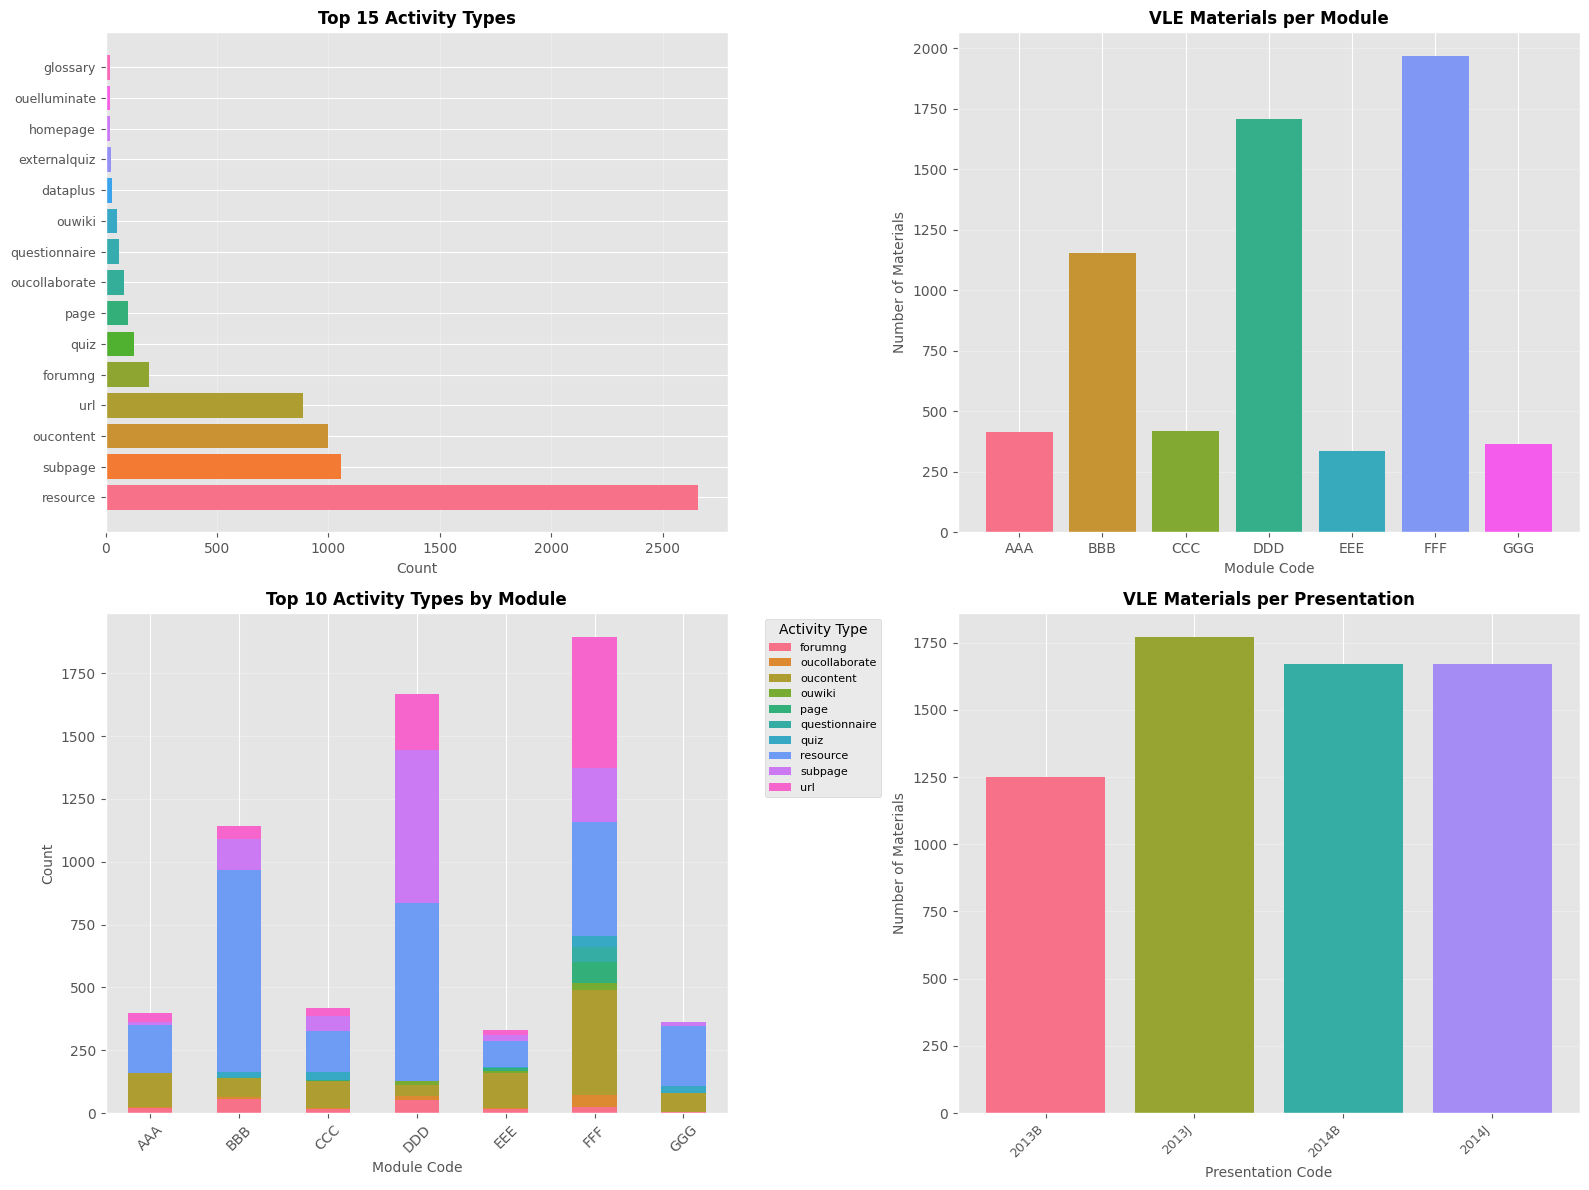

In [12]:
# VLE analysis
print("=" * 80)
print("VLE ANALYSIS")
print("=" * 80)

# Activity types
print("\nActivity Types Distribution:")
activity_counts = vle_df['activity_type'].value_counts()
print(activity_counts)

# VLE materials per module
vle_per_module = vle_df.groupby('code_module').size()
print("\nVLE Materials per Module:")
print(vle_per_module)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Activity types (top 15)
top_activities = activity_counts.head(15)
axes[0, 0].barh(range(len(top_activities)), top_activities.values, 
                color=sns.color_palette("husl", len(top_activities)))
axes[0, 0].set_yticks(range(len(top_activities)))
axes[0, 0].set_yticklabels(top_activities.index, fontsize=9)
axes[0, 0].set_xlabel('Count', fontsize=10)
axes[0, 0].set_title('Top 15 Activity Types', fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)

# VLE materials per module
axes[0, 1].bar(vle_per_module.index, vle_per_module.values, 
               color=sns.color_palette("husl", len(vle_per_module)))
axes[0, 1].set_title('VLE Materials per Module', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Module Code', fontsize=10)
axes[0, 1].set_ylabel('Number of Materials', fontsize=10)
axes[0, 1].grid(axis='y', alpha=0.3)

# Activity types by module (top 10 activity types)
top_10_activities = activity_counts.head(10).index
vle_filtered = vle_df[vle_df['activity_type'].isin(top_10_activities)]
activity_module = pd.crosstab(vle_filtered['code_module'], vle_filtered['activity_type'])
activity_module.plot(kind='bar', stacked=True, ax=axes[1, 0], 
                     color=sns.color_palette("husl", len(activity_module.columns)))
axes[1, 0].set_title('Top 10 Activity Types by Module', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Module Code', fontsize=10)
axes[1, 0].set_ylabel('Count', fontsize=10)
axes[1, 0].legend(title='Activity Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# VLE materials per presentation
vle_per_presentation = vle_df.groupby('code_presentation').size()
axes[1, 1].bar(range(len(vle_per_presentation)), vle_per_presentation.values, 
               color=sns.color_palette("husl", len(vle_per_presentation)))
axes[1, 1].set_xticks(range(len(vle_per_presentation)))
axes[1, 1].set_xticklabels(vle_per_presentation.index, rotation=45, ha='right', fontsize=9)
axes[1, 1].set_title('VLE Materials per Presentation', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Presentation Code', fontsize=10)
axes[1, 1].set_ylabel('Number of Materials', fontsize=10)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## 3. Bivariate and Multivariate Analysis

### 3.1 Demographics vs. Performance


DEMOGRAPHICS VS PERFORMANCE ANALYSIS

Gender vs Performance:
final_result  Distinction   Fail   Pass  Withdrawn
gender                                            
F                    9.47  21.08  38.97      30.48
M                    9.12  22.09  37.07      31.72


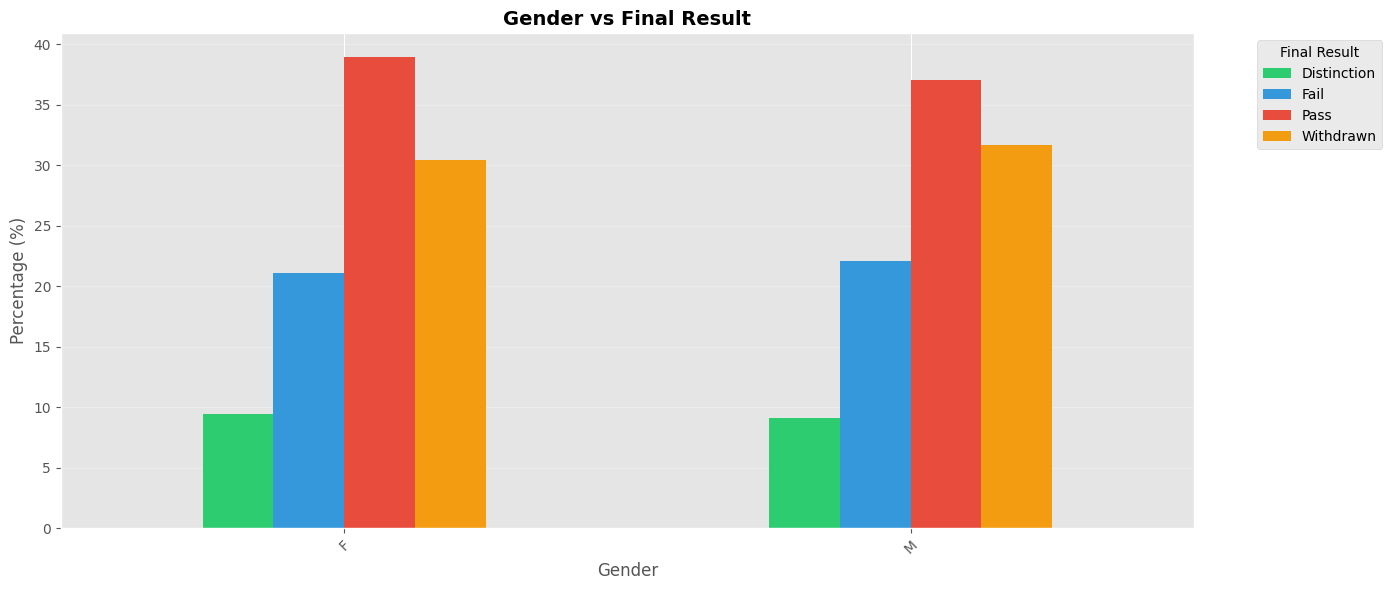

final_result,Distinction,Fail,Pass,Withdrawn
gender,,,,
F,9.471396,21.083028,38.965892,30.479685
M,9.118881,22.092308,37.068531,31.720280


In [13]:
# Demographics vs Performance
print("=" * 80)
print("DEMOGRAPHICS VS PERFORMANCE ANALYSIS")
print("=" * 80)

# Function to create performance comparison charts
def plot_performance_by_category(df, category_col, title):
    """Plot performance distribution by category"""
    result_by_cat = pd.crosstab(df[category_col], df['final_result'], normalize='index') * 100
    
    fig, ax = plt.subplots(figsize=(14, 6))
    result_by_cat.plot(kind='bar', ax=ax, color=['#2ecc71', '#3498db', '#e74c3c', '#f39c12'])
    ax.set_title(f'{title} vs Final Result', fontsize=14, fontweight='bold')
    ax.set_xlabel(category_col.replace('_', ' ').title(), fontsize=12)
    ax.set_ylabel('Percentage (%)', fontsize=12)
    ax.legend(title='Final Result', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return result_by_cat

# Gender vs Performance
print("\nGender vs Performance:")
gender_perf = pd.crosstab(student_info_df['gender'], student_info_df['final_result'], normalize='index') * 100
print(gender_perf.round(2))
plot_performance_by_category(student_info_df, 'gender', 'Gender')



Age Band vs Performance:
final_result  Distinction   Fail   Pass  Withdrawn
age_band                                          
0-35                 8.12  22.80  36.91      32.17
35-55               11.87  19.00  40.28      28.85
55<=                18.98  13.43  42.59      25.00


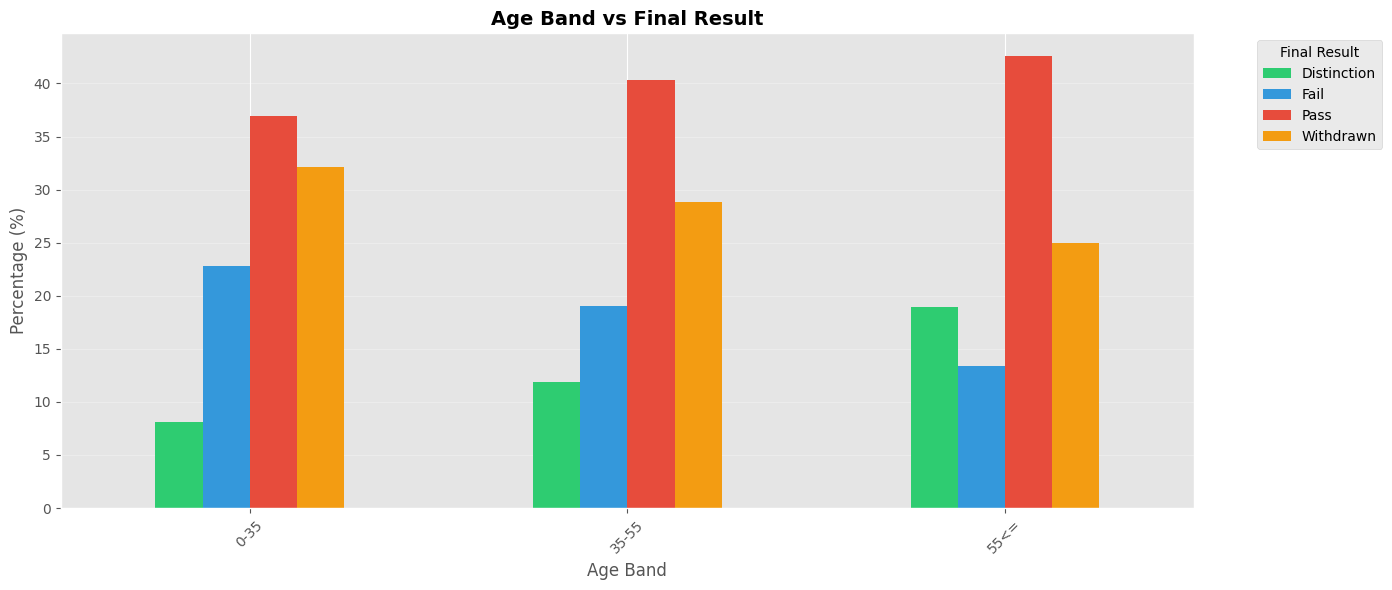

final_result,Distinction,Fail,Pass,Withdrawn
age_band,,,,
0-35,8.119770,22.798989,36.911611,32.169630
35-55,11.873211,18.997138,40.284109,28.845542
55<=,18.981481,13.425926,42.592593,25.000000


In [14]:
# Age Band vs Performance
print("\nAge Band vs Performance:")
age_perf = pd.crosstab(student_info_df['age_band'], student_info_df['final_result'], normalize='index') * 100
print(age_perf.round(2))
plot_performance_by_category(student_info_df, 'age_band', 'Age Band')



Highest Education vs Performance:
final_result                 Distinction   Fail   Pass  Withdrawn
highest_education                                                
A Level or Equivalent              10.65  19.27  41.38      28.69
HE Qualification                   14.74  16.70  41.44      27.12
Lower Than A Level                  5.53  26.04  33.33      35.11
No Formal quals                     4.61  27.38  25.07      42.94
Post Graduate Qualification        28.12  10.86  37.38      23.64


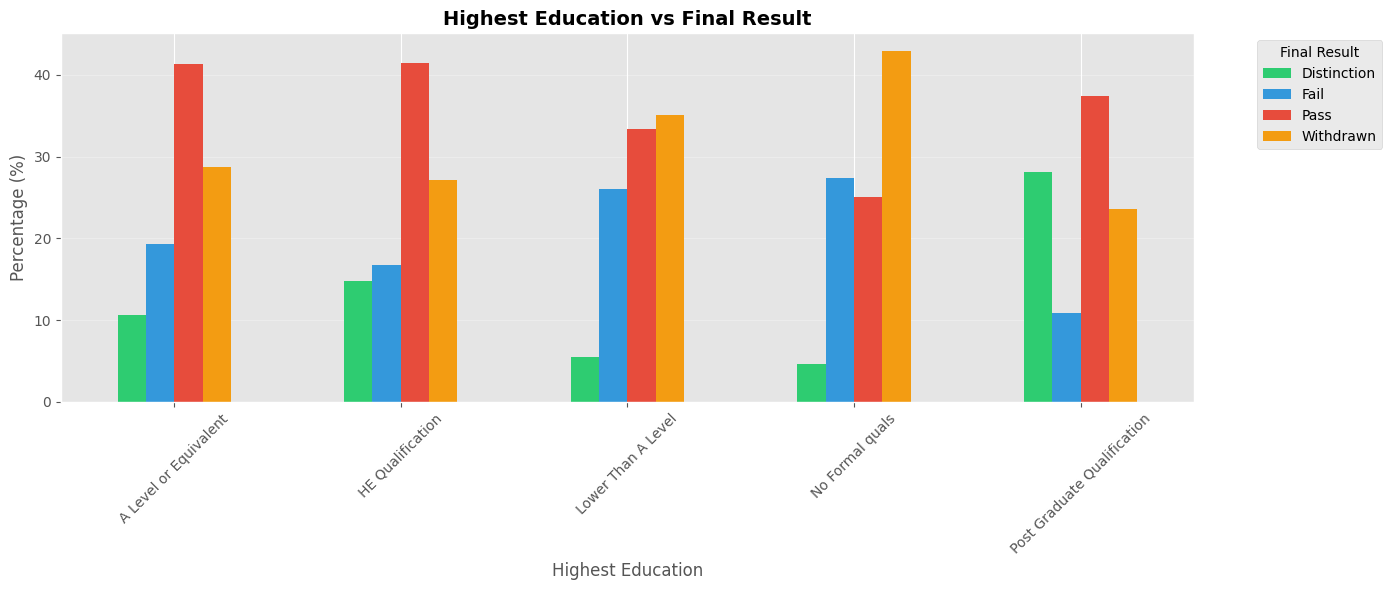

final_result,Distinction,Fail,Pass,Withdrawn
highest_education,,,,
A Level or Equivalent,10.651477,19.273763,41.381274,28.693485
HE Qualification,14.735729,16.701903,41.437632,27.124736
Lower Than A Level,5.525156,26.037392,33.325733,35.111719
No Formal quals,4.610951,27.377522,25.072046,42.939481
Post Graduate Qualification,28.115016,10.862620,37.380192,23.642173


In [15]:
# Highest Education vs Performance
print("\nHighest Education vs Performance:")
edu_perf = pd.crosstab(student_info_df['highest_education'], student_info_df['final_result'], normalize='index') * 100
print(edu_perf.round(2))
plot_performance_by_category(student_info_df, 'highest_education', 'Highest Education')



IMD Band vs Performance:
final_result  Distinction   Fail   Pass  Withdrawn
imd_band                                          
0-10%                5.07  27.67  30.08      37.18
10-20                5.43  25.94  33.19      35.44
20-30%               7.20  23.10  33.55      36.15
30-40%               8.90  22.15  38.01      30.94
40-50%               9.00  21.41  37.59      32.00
50-60%               9.51  22.44  39.28      28.78
60-70%              10.29  18.52  41.62      29.57
70-80%              10.87  20.81  40.64      27.68
80-90%              11.88  17.92  42.18      28.02
90-100%             14.12  16.60  43.41      25.87


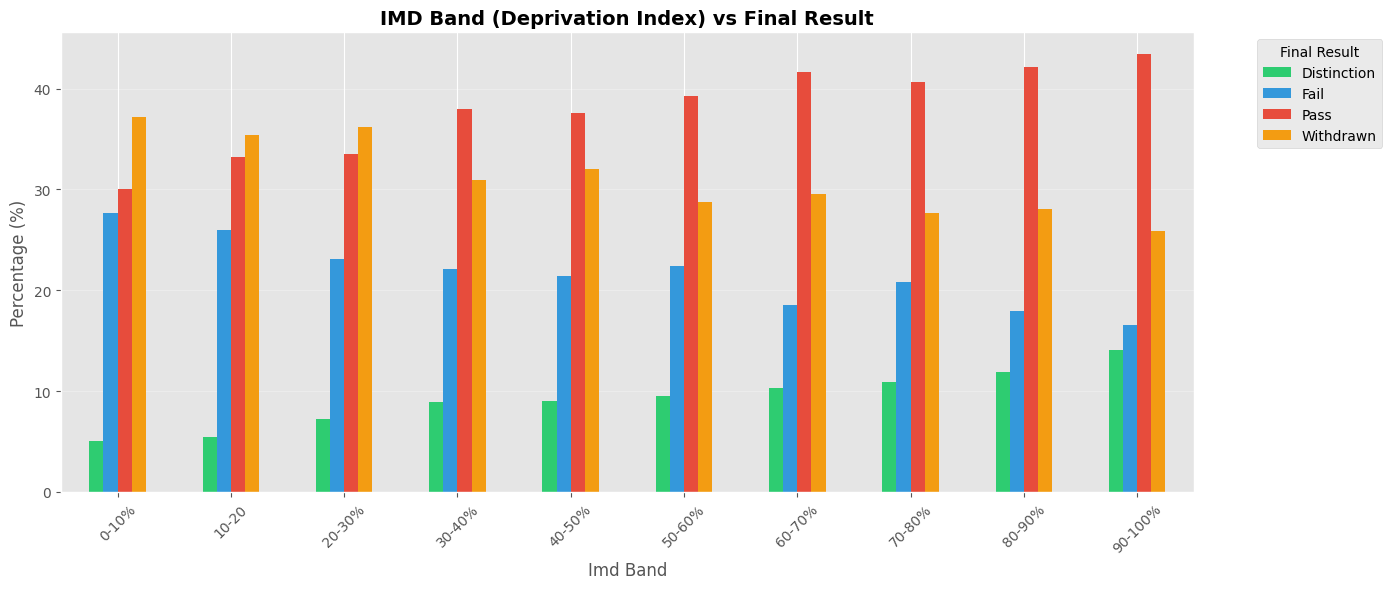

final_result,Distinction,Fail,Pass,Withdrawn
imd_band,,,,
0-10%,5.073996,27.665358,30.081546,37.179100
10-20,5.432309,25.938567,33.191126,35.437998
20-30%,7.197592,23.097975,33.552271,36.152162
30-40%,8.900819,22.153151,38.005086,30.940944
40-50%,8.998771,21.406634,37.592138,32.002457
50-60%,9.507042,22.439181,39.276569,28.777209
60-70%,10.292599,18.519793,41.617900,29.569707
70-80%,10.871830,20.805835,40.639111,27.683223
80-90%,11.875453,17.921796,42.179580,28.023172


In [16]:
# IMD Band vs Performance (top regions)
print("\nIMD Band vs Performance:")
imd_perf = pd.crosstab(student_info_df['imd_band'], student_info_df['final_result'], normalize='index') * 100
print(imd_perf.round(2))
plot_performance_by_category(student_info_df, 'imd_band', 'IMD Band (Deprivation Index)')



Disability vs Performance:
final_result  Distinction   Fail   Pass  Withdrawn
disability                                        
N                    9.52  21.54  38.66      30.28
Y                    7.05  22.50  31.10      39.35


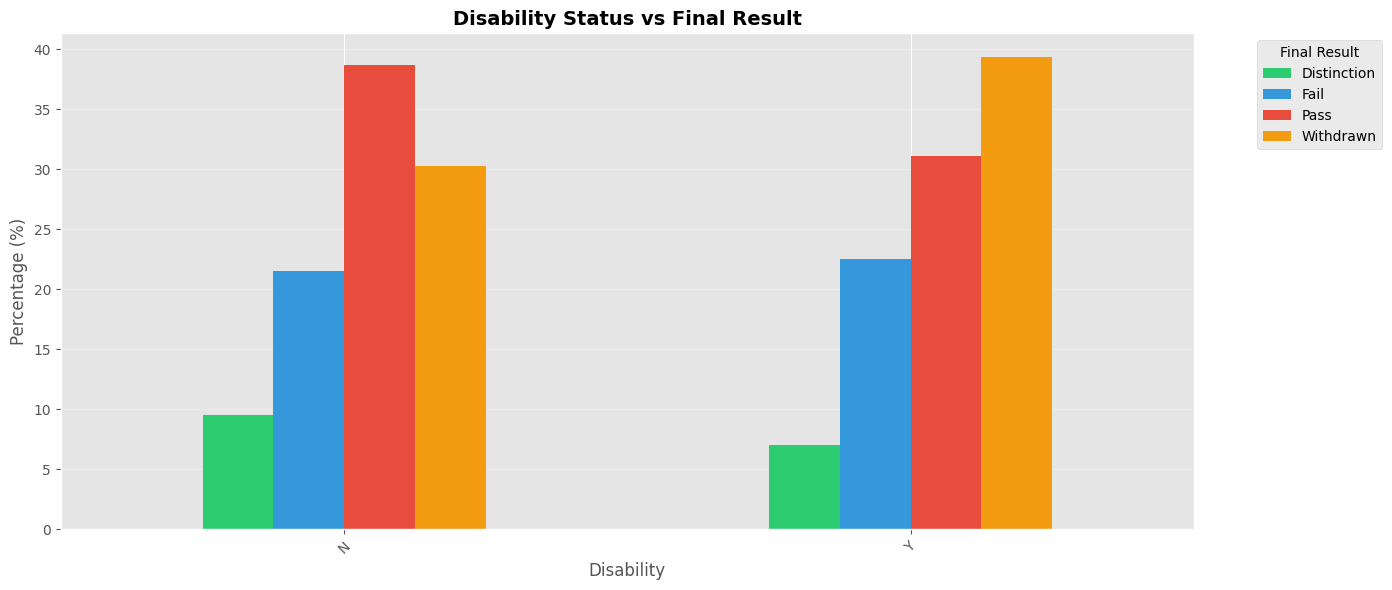

final_result,Distinction,Fail,Pass,Withdrawn
disability,,,,
N,9.517823,21.543376,38.659146,30.279656
Y,7.048040,22.503161,31.099874,39.348925


In [17]:
# Disability vs Performance
print("\nDisability vs Performance:")
disability_perf = pd.crosstab(student_info_df['disability'], student_info_df['final_result'], normalize='index') * 100
print(disability_perf.round(2))
plot_performance_by_category(student_info_df, 'disability', 'Disability Status')



Previous Attempts vs Performance:
final_result          Distinction   Fail   Pass  Withdrawn
num_of_prev_attempts                                      
0                           10.05  20.16  39.22      30.56
1                            4.33  30.59  30.22      34.86
2                            3.26  34.96  25.19      36.59
3                            0.70  40.14  21.83      37.32
4                            0.00  30.77  33.33      35.90
5                            0.00  46.15  15.38      38.46
6                           25.00  25.00   0.00      50.00


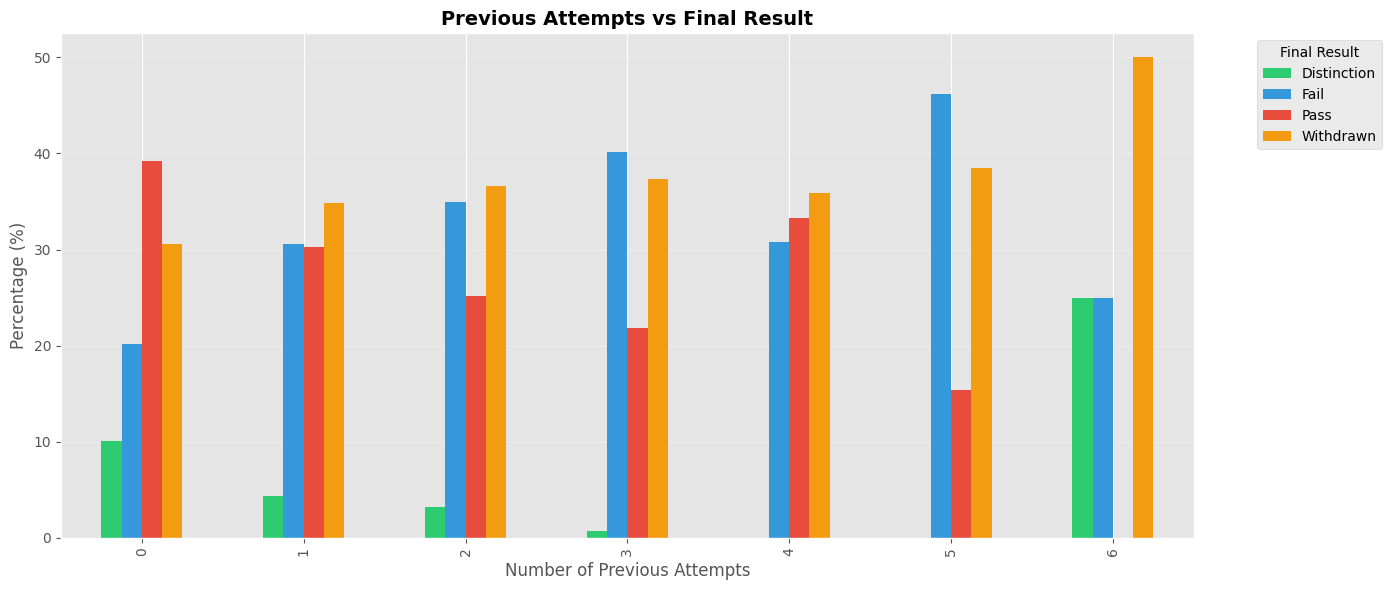

In [18]:
# Previous Attempts vs Performance
print("\nPrevious Attempts vs Performance:")
prev_attempts_perf = pd.crosstab(student_info_df['num_of_prev_attempts'], student_info_df['final_result'], normalize='index') * 100
print(prev_attempts_perf.round(2))

fig, ax = plt.subplots(figsize=(14, 6))
prev_attempts_perf.plot(kind='bar', ax=ax, color=['#2ecc71', '#3498db', '#e74c3c', '#f39c12'])
ax.set_title('Previous Attempts vs Final Result', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Previous Attempts', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.legend(title='Final Result', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


### 3.2 Course Characteristics vs. Performance


MODULE VS PERFORMANCE

Module vs Performance (%):
final_result  Distinction   Fail   Pass  Withdrawn
code_module                                       
AAA                  5.88  12.17  65.11      16.84
BBB                  8.56  22.34  38.91      30.19
CCC                 11.23  17.61  26.61      44.54
DDD                  6.11  22.51  35.51      35.87
EEE                 12.13  19.15  44.10      24.61
FFF                  8.63  22.04  38.37      30.96
GGG                 15.63  28.73  44.12      11.52


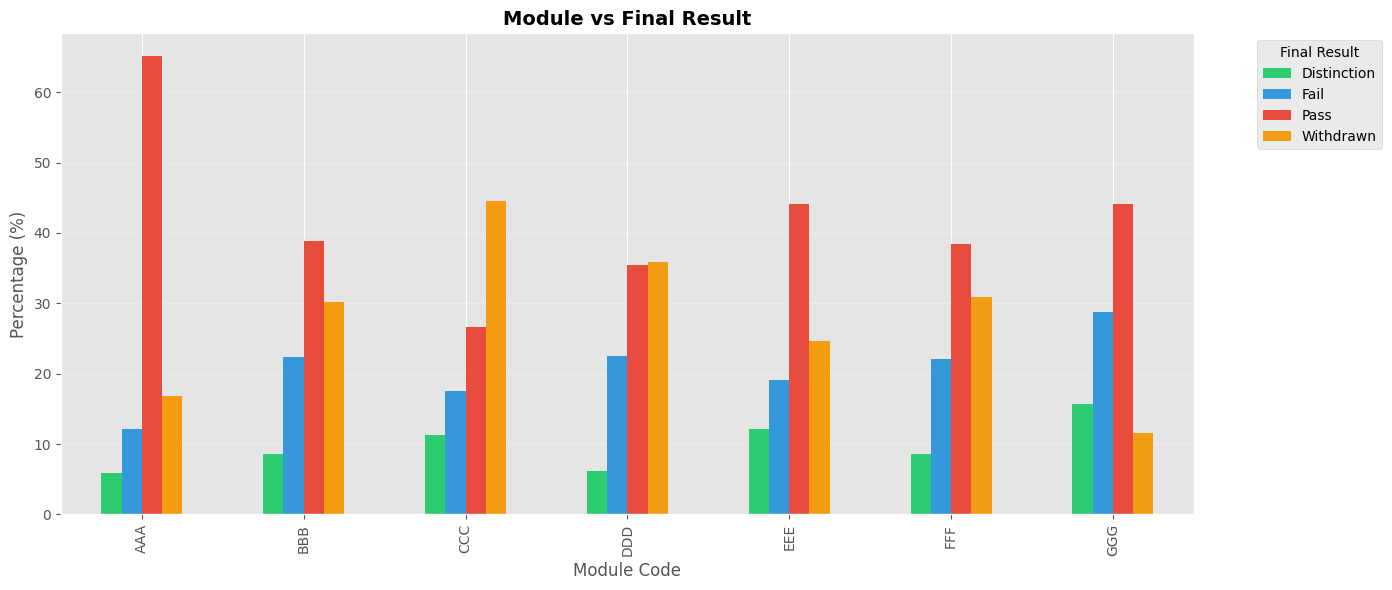


Pass Rates by Module:
code_module
AAA    70.99
GGG    59.75
EEE    56.24
BBB    47.46
FFF    47.00
DDD    41.61
CCC    37.84
dtype: float64


In [19]:
# Module vs Performance
print("=" * 80)
print("MODULE VS PERFORMANCE")
print("=" * 80)

module_perf = pd.crosstab(student_info_df['code_module'], student_info_df['final_result'], normalize='index') * 100
print("\nModule vs Performance (%):")
print(module_perf.round(2))

fig, ax = plt.subplots(figsize=(14, 6))
module_perf.plot(kind='bar', ax=ax, color=['#2ecc71', '#3498db', '#e74c3c', '#f39c12'])
ax.set_title('Module vs Final Result', fontsize=14, fontweight='bold')
ax.set_xlabel('Module Code', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.legend(title='Final Result', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate pass rates by module
print("\nPass Rates by Module:")
module_pass_rates = student_info_df.groupby('code_module').apply(
    lambda x: (x['final_result'].isin(['Pass', 'Distinction']).sum() / len(x)) * 100
).sort_values(ascending=False)
print(module_pass_rates.round(2))



PRESENTATION VS PERFORMANCE

Presentation vs Performance (%):
final_result       Distinction   Fail   Pass  Withdrawn
code_presentation                                      
2013B                     6.98  26.49  37.75      28.78
2013J                     8.47  22.62  42.13      26.78
2014B                    10.05  23.49  32.98      33.48
2014J                    10.34  17.56  38.13      33.98


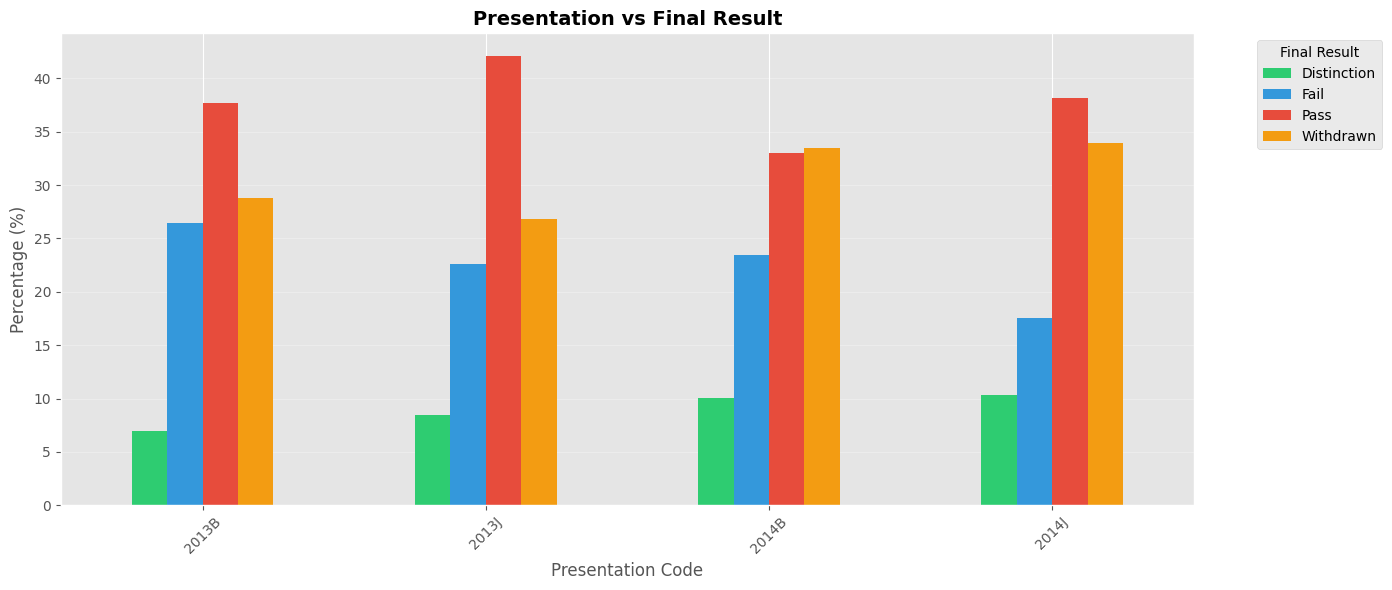


Presentation Type (B=February, J=October) vs Performance (%):
final_result       Distinction   Fail   Pass  Withdrawn
presentation_type                                      
B                         8.90  24.62  34.77      31.72
J                         9.52  19.79  39.89      30.81


In [20]:
# Presentation (B vs J) vs Performance
print("\n" + "=" * 80)
print("PRESENTATION VS PERFORMANCE")
print("=" * 80)

presentation_perf = pd.crosstab(student_info_df['code_presentation'], student_info_df['final_result'], normalize='index') * 100
print("\nPresentation vs Performance (%):")
print(presentation_perf.round(2))

fig, ax = plt.subplots(figsize=(14, 6))
presentation_perf.plot(kind='bar', ax=ax, color=['#2ecc71', '#3498db', '#e74c3c', '#f39c12'])
ax.set_title('Presentation vs Final Result', fontsize=14, fontweight='bold')
ax.set_xlabel('Presentation Code', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.legend(title='Final Result', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Compare B (February) vs J (October) presentations
student_info_df['presentation_type'] = student_info_df['code_presentation'].str[-1]
presentation_type_perf = pd.crosstab(student_info_df['presentation_type'], student_info_df['final_result'], normalize='index') * 100
print("\nPresentation Type (B=February, J=October) vs Performance (%):")
print(presentation_type_perf.round(2))


### 3.3 Registration Patterns Analysis


REGISTRATION PATTERNS ANALYSIS

Registration Date Statistics:
count    32548.000000
mean       -69.411300
std         49.260522
min       -322.000000
25%       -100.000000
50%        -57.000000
75%        -29.000000
max        167.000000
Name: date_registration, dtype: float64

Registration Timing vs Performance (%):
final_result                  Distinction   Fail   Pass  Withdrawn
registration_timing                                               
Early (30-60 days before)            9.71  22.06  40.06      28.18
Late (0-30 days after)               7.27  27.27  44.55      20.91
On Time (0-30 days before)          10.11  25.30  39.02      25.57
Unknown                              0.00  11.11   2.22      86.67
Very Early (>60 days before)         8.62  19.20  36.12      36.07
Very Late (>30 days after)           6.25  43.75  31.25      18.75


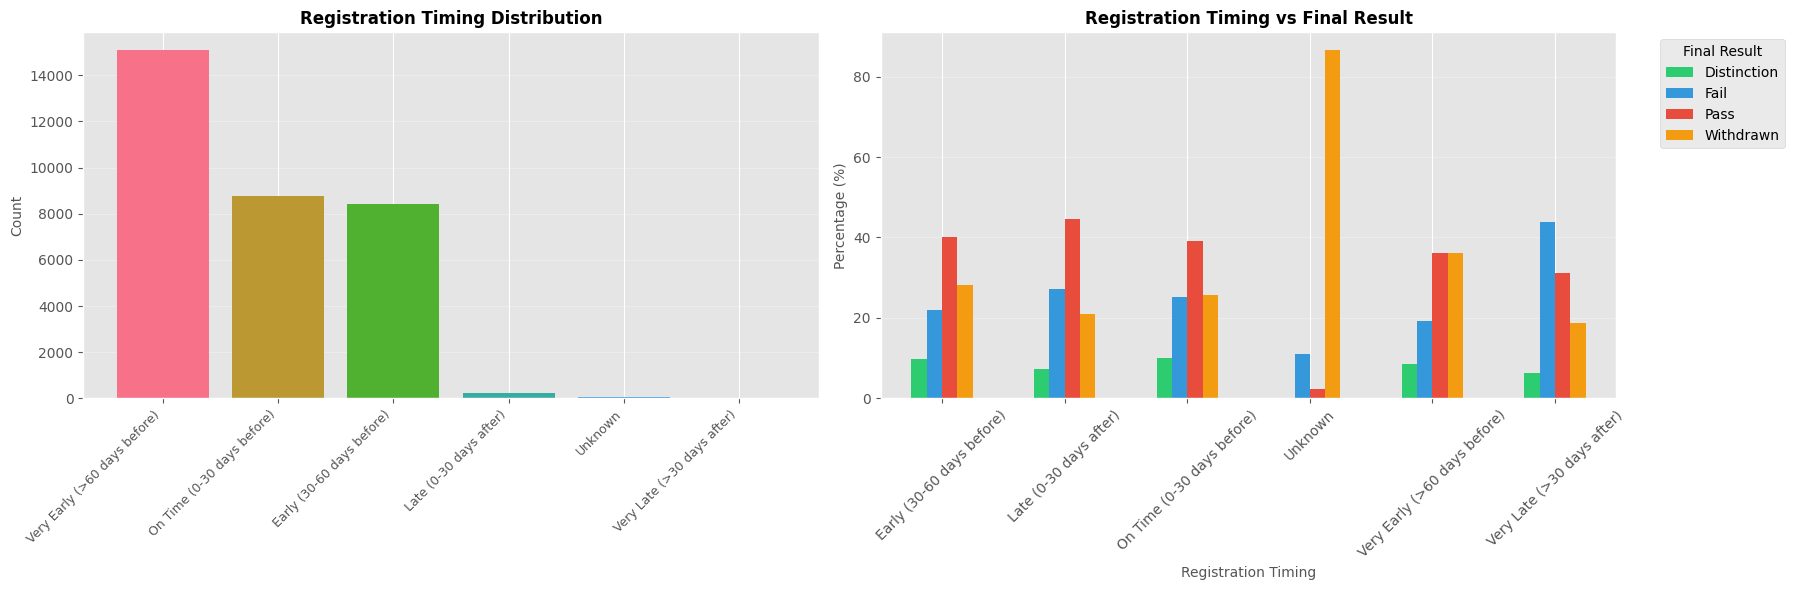

In [21]:
# Registration patterns analysis
print("=" * 80)
print("REGISTRATION PATTERNS ANALYSIS")
print("=" * 80)

# Merge registration data with student info
reg_perf = student_reg_df.merge(
    student_info_df[['code_module', 'code_presentation', 'id_student', 'final_result']],
    on=['code_module', 'code_presentation', 'id_student'],
    how='inner'
)

# Registration timing analysis
print("\nRegistration Date Statistics:")
print(reg_perf['date_registration'].describe())

# Categorize registration timing
def categorize_registration_timing(days):
    if pd.isna(days):
        return 'Unknown'
    elif days < -60:
        return 'Very Early (>60 days before)'
    elif days < -30:
        return 'Early (30-60 days before)'
    elif days < 0:
        return 'On Time (0-30 days before)'
    elif days <= 30:
        return 'Late (0-30 days after)'
    else:
        return 'Very Late (>30 days after)'

reg_perf['registration_timing'] = reg_perf['date_registration'].apply(categorize_registration_timing)

# Registration timing vs Performance
reg_timing_perf = pd.crosstab(reg_perf['registration_timing'], reg_perf['final_result'], normalize='index') * 100
print("\nRegistration Timing vs Performance (%):")
print(reg_timing_perf.round(2))

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Registration timing distribution
reg_timing_counts = reg_perf['registration_timing'].value_counts()
axes[0].bar(range(len(reg_timing_counts)), reg_timing_counts.values, 
            color=sns.color_palette("husl", len(reg_timing_counts)))
axes[0].set_xticks(range(len(reg_timing_counts)))
axes[0].set_xticklabels(reg_timing_counts.index, rotation=45, ha='right', fontsize=9)
axes[0].set_title('Registration Timing Distribution', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=10)
axes[0].grid(axis='y', alpha=0.3)

# Registration timing vs Performance
reg_timing_perf.plot(kind='bar', ax=axes[1], color=['#2ecc71', '#3498db', '#e74c3c', '#f39c12'])
axes[1].set_title('Registration Timing vs Final Result', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Registration Timing', fontsize=10)
axes[1].set_ylabel('Percentage (%)', fontsize=10)
axes[1].legend(title='Final Result', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()



UNREGISTRATION ANALYSIS

Total students who unregistered: 10,072
Percentage of all students: 30.90%

Unregistration Date Statistics:
count    10072.000000
mean        49.757645
std         82.460890
min       -365.000000
25%         -2.000000
50%         27.000000
75%        109.000000
max        444.000000
Name: date_unregistration, dtype: float64


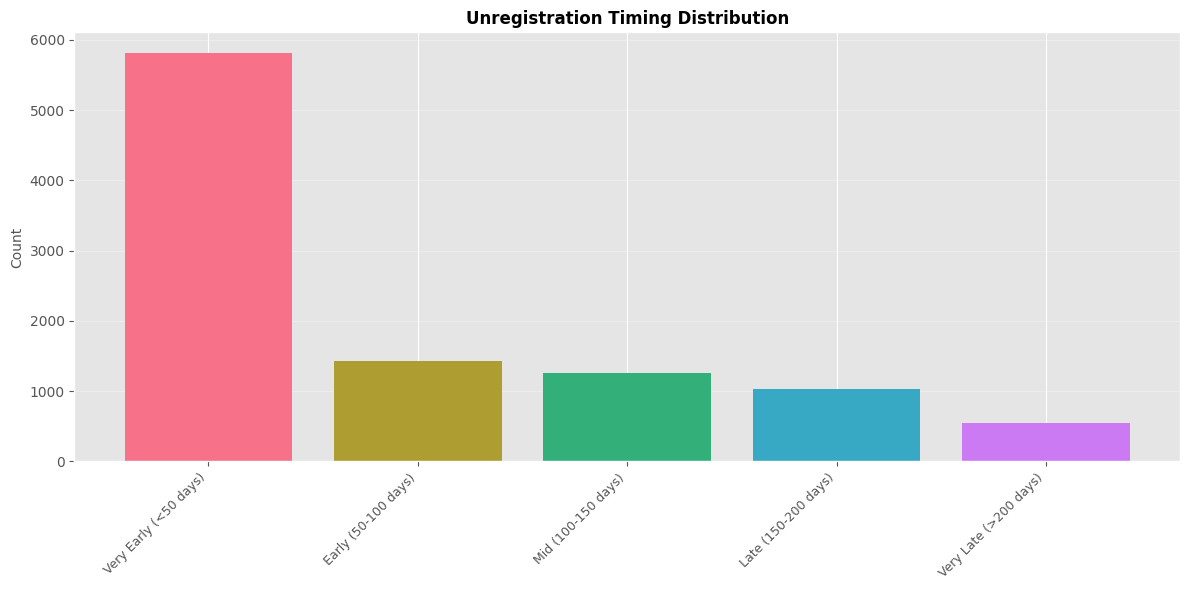

In [22]:
# Unregistration analysis
print("\n" + "=" * 80)
print("UNREGISTRATION ANALYSIS")
print("=" * 80)

# Students who unregistered
unregistered = reg_perf[reg_perf['date_unregistration'].notna()]
print(f"\nTotal students who unregistered: {len(unregistered):,}")
print(f"Percentage of all students: {len(unregistered) / len(reg_perf) * 100:.2f}%")

if len(unregistered) > 0:
    print("\nUnregistration Date Statistics:")
    print(unregistered['date_unregistration'].describe())
    
    # Unregistration timing
    def categorize_unregistration_timing(days):
        if pd.isna(days):
            return 'Unknown'
        elif days < 50:
            return 'Very Early (<50 days)'
        elif days < 100:
            return 'Early (50-100 days)'
        elif days < 150:
            return 'Mid (100-150 days)'
        elif days < 200:
            return 'Late (150-200 days)'
        else:
            return 'Very Late (>200 days)'
    
    unregistered['unregistration_timing'] = unregistered['date_unregistration'].apply(categorize_unregistration_timing)
    
    unreg_timing_counts = unregistered['unregistration_timing'].value_counts()
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(range(len(unreg_timing_counts)), unreg_timing_counts.values, 
           color=sns.color_palette("husl", len(unreg_timing_counts)))
    ax.set_xticks(range(len(unreg_timing_counts)))
    ax.set_xticklabels(unreg_timing_counts.index, rotation=45, ha='right', fontsize=9)
    ax.set_title('Unregistration Timing Distribution', fontsize=12, fontweight='bold')
    ax.set_ylabel('Count', fontsize=10)
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()


### 3.4 Assessment Performance Analysis


In [23]:
# Assessment performance analysis
print("=" * 80)
print("ASSESSMENT PERFORMANCE ANALYSIS")
print("=" * 80)

# Merge assessment data with student info
# First merge with assessments_df to get module and presentation codes
assess_perf = student_assess_df.merge(
    assessments_df[['id_assessment', 'code_module', 'code_presentation', 'assessment_type', 'weight']],
    on='id_assessment',
    how='left'
).merge(
    student_info_df[['code_module', 'code_presentation', 'id_student', 'final_result']],
    on=['code_module', 'code_presentation', 'id_student'],
    how='left'
)

print(f"\nTotal assessment submissions: {len(assess_perf):,}")
print(f"Students with assessment data: {assess_perf['id_student'].nunique():,}")

# Score statistics
print("\nAssessment Score Statistics:")
print(assess_perf['score'].describe())

# Score distribution by assessment type
print("\nScore Statistics by Assessment Type:")
print(assess_perf.groupby('assessment_type')['score'].describe())


ASSESSMENT PERFORMANCE ANALYSIS

Total assessment submissions: 173,912
Students with assessment data: 23,369

Assessment Score Statistics:
count    173739.000000
mean         75.799573
std          18.798107
min           0.000000
25%          65.000000
50%          80.000000
75%          90.000000
max         100.000000
Name: score, dtype: float64

Score Statistics by Assessment Type:
                   count       mean        std  min   25%   50%   75%    max
assessment_type                                                             
CMA              70527.0  81.027053  17.836026  0.0  72.0  82.0  98.0  100.0
Exam              4959.0  65.572898  20.579186  0.0  51.0  67.0  82.0  100.0
TMA              98253.0  72.563392  18.432823  0.0  63.0  76.0  86.0  100.0


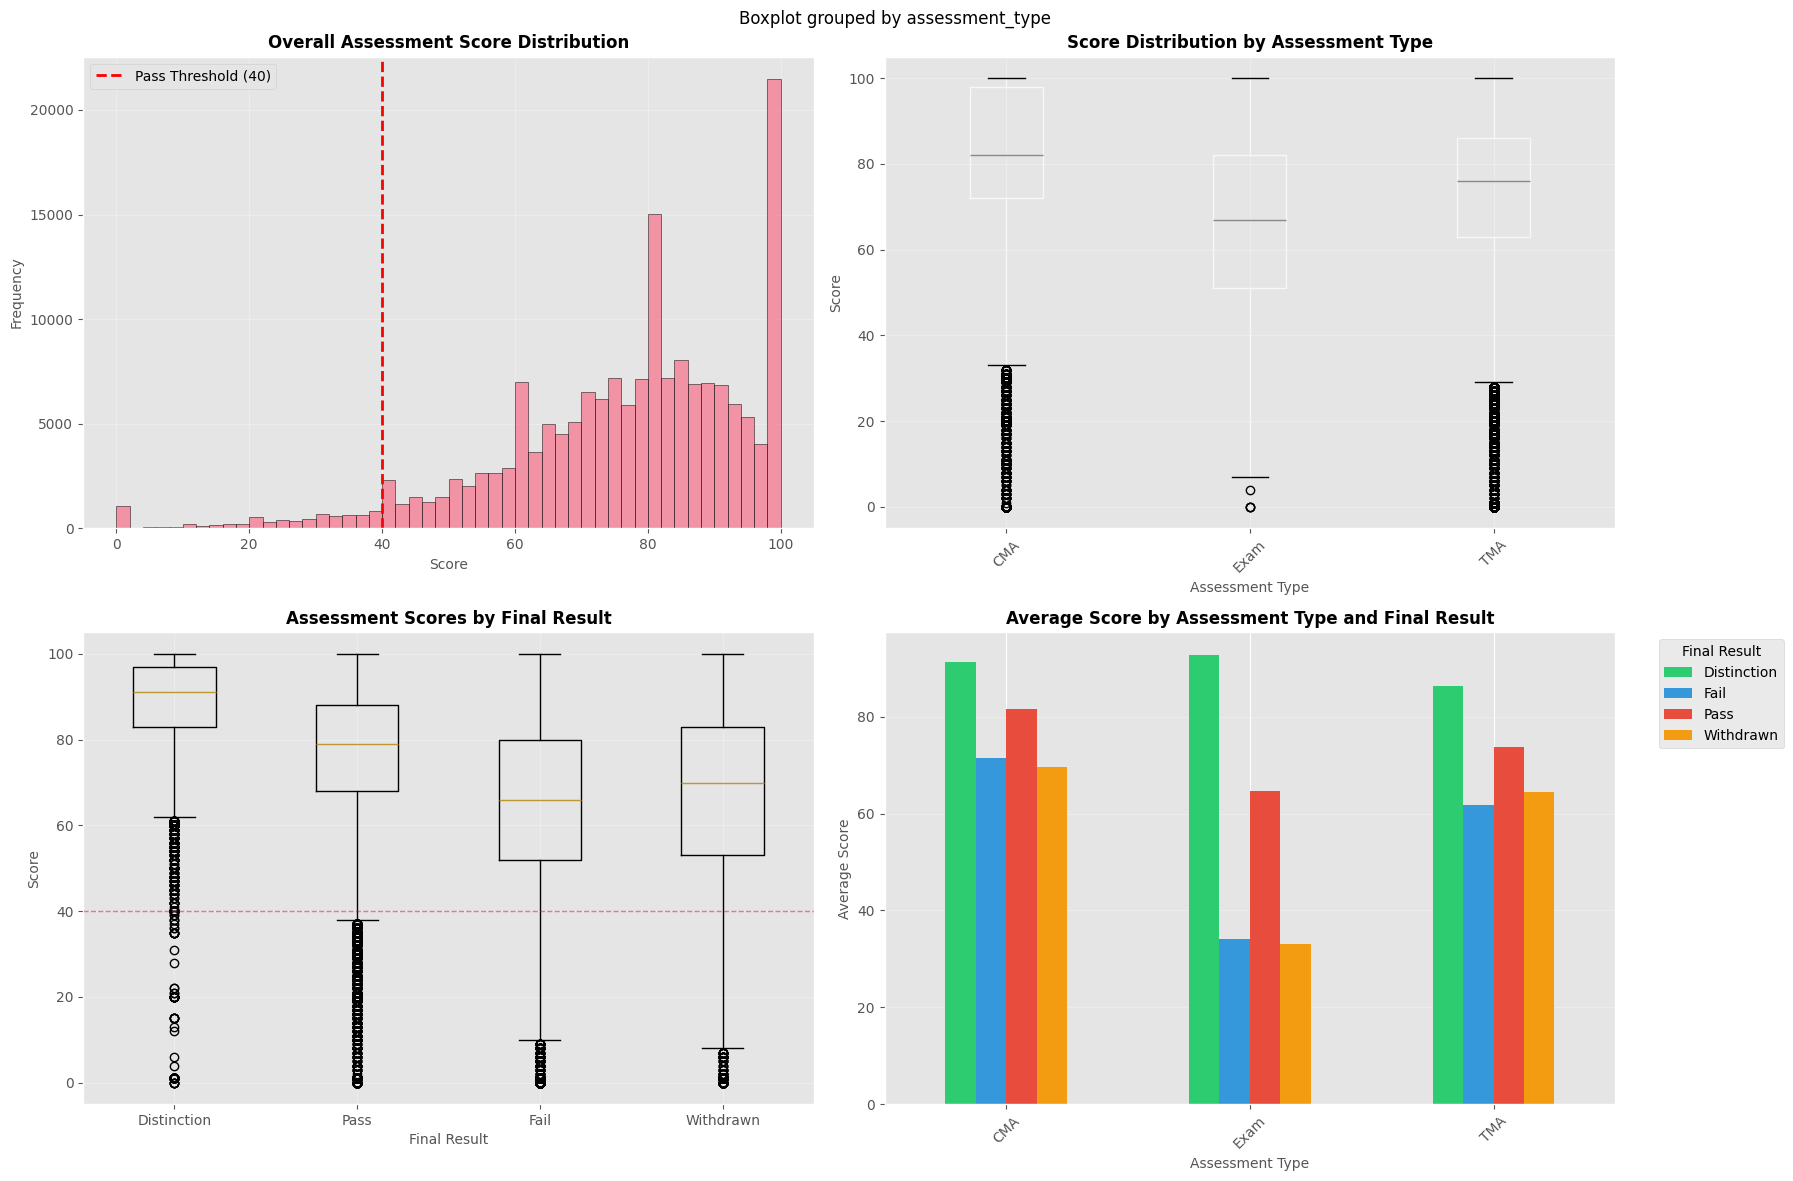

In [24]:
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Overall score distribution
axes[0, 0].hist(assess_perf['score'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(40, color='red', linestyle='--', linewidth=2, label='Pass Threshold (40)')
axes[0, 0].set_title('Overall Assessment Score Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Score', fontsize=10)
axes[0, 0].set_ylabel('Frequency', fontsize=10)
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Score distribution by assessment type
assess_perf[assess_perf['score'].notna()].boxplot(column='score', by='assessment_type', ax=axes[0, 1])
axes[0, 1].set_title('Score Distribution by Assessment Type', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Assessment Type', fontsize=10)
axes[0, 1].set_ylabel('Score', fontsize=10)
axes[0, 1].grid(alpha=0.3)
plt.setp(axes[0, 1].xaxis.get_majorticklabels(), rotation=45)

# Score vs Final Result
assess_perf_clean = assess_perf[assess_perf['score'].notna() & assess_perf['final_result'].notna()]
score_by_result = [assess_perf_clean[assess_perf_clean['final_result'] == result]['score'].values 
                   for result in ['Distinction', 'Pass', 'Fail', 'Withdrawn']]
axes[1, 0].boxplot(score_by_result, labels=['Distinction', 'Pass', 'Fail', 'Withdrawn'])
axes[1, 0].axhline(40, color='red', linestyle='--', linewidth=1, alpha=0.5)
axes[1, 0].set_title('Assessment Scores by Final Result', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Final Result', fontsize=10)
axes[1, 0].set_ylabel('Score', fontsize=10)
axes[1, 0].grid(alpha=0.3)

# Average score by assessment type and final result
avg_score_by_type_result = assess_perf_clean.groupby(['assessment_type', 'final_result'])['score'].mean().unstack()
avg_score_by_type_result.plot(kind='bar', ax=axes[1, 1], color=['#2ecc71', '#3498db', '#e74c3c', '#f39c12'])
axes[1, 1].set_title('Average Score by Assessment Type and Final Result', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Assessment Type', fontsize=10)
axes[1, 1].set_ylabel('Average Score', fontsize=10)
axes[1, 1].legend(title='Final Result', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### 3.5 VLE Engagement Analysis


In [25]:
# VLE engagement analysis
print("=" * 80)
print("VLE ENGAGEMENT ANALYSIS")
print("=" * 80)

# Calculate engagement metrics per student
print("Calculating student engagement metrics...")
student_engagement = student_vle_df.groupby(['code_module', 'code_presentation', 'id_student']).agg({
    'sum_click': ['sum', 'mean', 'count'],
    'id_site': 'nunique'
}).reset_index()

student_engagement.columns = ['code_module', 'code_presentation', 'id_student', 
                              'total_clicks', 'avg_clicks_per_day', 'days_active', 'unique_materials']

# Merge with student info
student_engagement = student_engagement.merge(
    student_info_df[['code_module', 'code_presentation', 'id_student', 'final_result']],
    on=['code_module', 'code_presentation', 'id_student'],
    how='inner'
)

print(f"\nStudents with VLE engagement data: {len(student_engagement):,}")

# Engagement statistics
print("\nEngagement Statistics:")
print(student_engagement[['total_clicks', 'avg_clicks_per_day', 'days_active', 'unique_materials']].describe())


VLE ENGAGEMENT ANALYSIS
Calculating student engagement metrics...

Students with VLE engagement data: 29,228

Engagement Statistics:
       total_clicks  avg_clicks_per_day   days_active  unique_materials
count  29228.000000        29228.000000  29228.000000      29228.000000
mean    1355.039654            3.268088    364.557274         67.075955
std     1733.546045            1.226142    378.351476         54.953382
min        1.000000            1.000000      1.000000          1.000000
25%      260.750000            2.364436     93.000000         27.000000
50%      739.500000            3.080000    242.000000         51.000000
75%     1770.000000            3.997973    510.000000         93.000000
max    24139.000000           20.028933   3078.000000        413.000000



ENGAGEMENT METRICS BY FINAL RESULT
              total_clicks  avg_clicks_per_day  days_active  unique_materials
final_result                                                                 
Distinction        2666.76                3.61       682.88            102.45
Fail                688.36                3.05       196.43             45.49
Pass               1922.28                3.49       511.62             89.08
Withdrawn           444.82                2.94       133.36             34.33


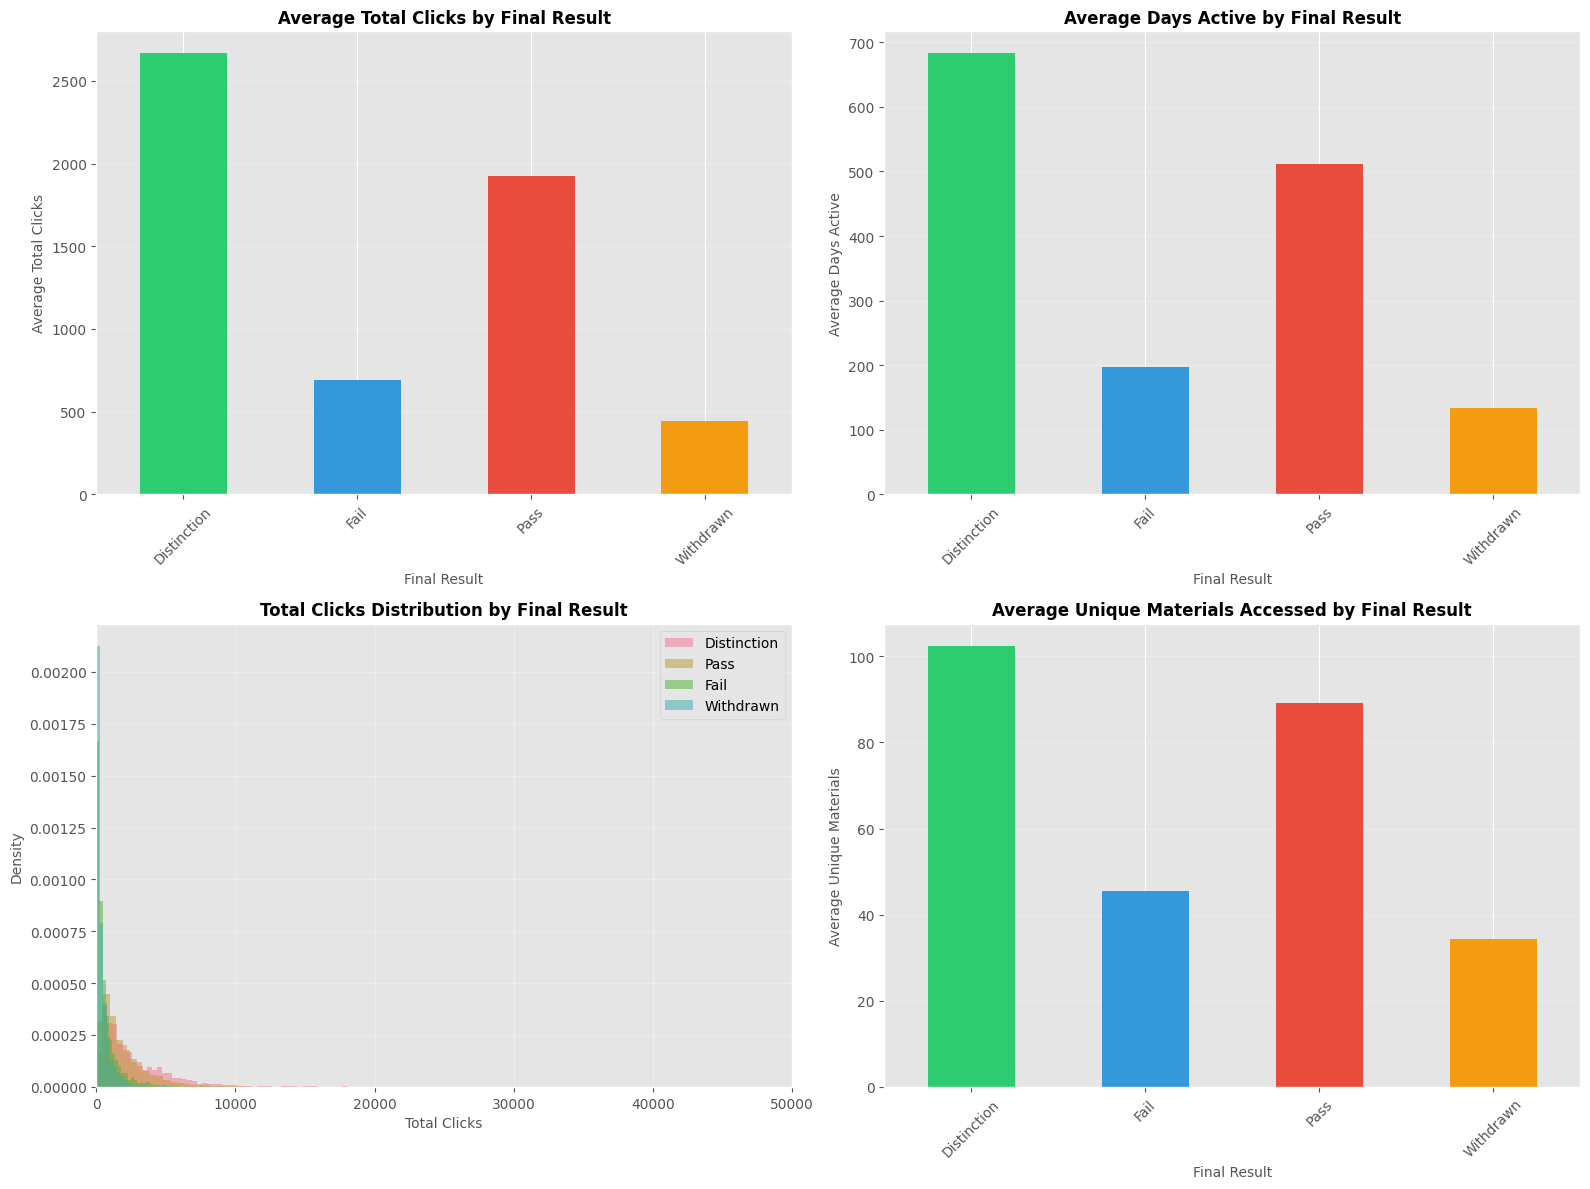

In [26]:
# Engagement vs Performance
print("\n" + "=" * 80)
print("ENGAGEMENT METRICS BY FINAL RESULT")
print("=" * 80)

engagement_by_result = student_engagement.groupby('final_result').agg({
    'total_clicks': 'mean',
    'avg_clicks_per_day': 'mean',
    'days_active': 'mean',
    'unique_materials': 'mean'
}).round(2)

print(engagement_by_result)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Total clicks by final result
engagement_by_result['total_clicks'].plot(kind='bar', ax=axes[0, 0], 
                                          color=['#2ecc71', '#3498db', '#e74c3c', '#f39c12'])
axes[0, 0].set_title('Average Total Clicks by Final Result', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Final Result', fontsize=10)
axes[0, 0].set_ylabel('Average Total Clicks', fontsize=10)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# Days active by final result
engagement_by_result['days_active'].plot(kind='bar', ax=axes[0, 1], 
                                         color=['#2ecc71', '#3498db', '#e74c3c', '#f39c12'])
axes[0, 1].set_title('Average Days Active by Final Result', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Final Result', fontsize=10)
axes[0, 1].set_ylabel('Average Days Active', fontsize=10)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# Total clicks distribution by final result
for result in ['Distinction', 'Pass', 'Fail', 'Withdrawn']:
    data = student_engagement[student_engagement['final_result'] == result]['total_clicks']
    axes[1, 0].hist(data, bins=50, alpha=0.5, label=result, density=True)
axes[1, 0].set_title('Total Clicks Distribution by Final Result', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Total Clicks', fontsize=10)
axes[1, 0].set_ylabel('Density', fontsize=10)
axes[1, 0].legend()
axes[1, 0].set_xlim(0, 50000)  # Limit x-axis for better visualization
axes[1, 0].grid(alpha=0.3)

# Unique materials by final result
engagement_by_result['unique_materials'].plot(kind='bar', ax=axes[1, 1], 
                                             color=['#2ecc71', '#3498db', '#e74c3c', '#f39c12'])
axes[1, 1].set_title('Average Unique Materials Accessed by Final Result', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Final Result', fontsize=10)
axes[1, 1].set_ylabel('Average Unique Materials', fontsize=10)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()



ENGAGEMENT BY ACTIVITY TYPE

Total Clicks by Activity Type and Final Result:
final_result   Distinction     Fail     Pass  Withdrawn
activity_type                                          
dataplus             14666     1685    30676        441
dualpane              4350     2310    12660       1396
externalquiz          7992     9546    39896       6858
folder                 728      499     4170         23
forumng            1890949   797183  4618185     667073
glossary             18777     8550    54309       6326
homepage           1411390   829614  4075697     632363
htmlactivity          1544     1258     4344       2093
oucollaborate        19291    11571    69291       8821
oucontent          2177655  1230329  7029828     768991


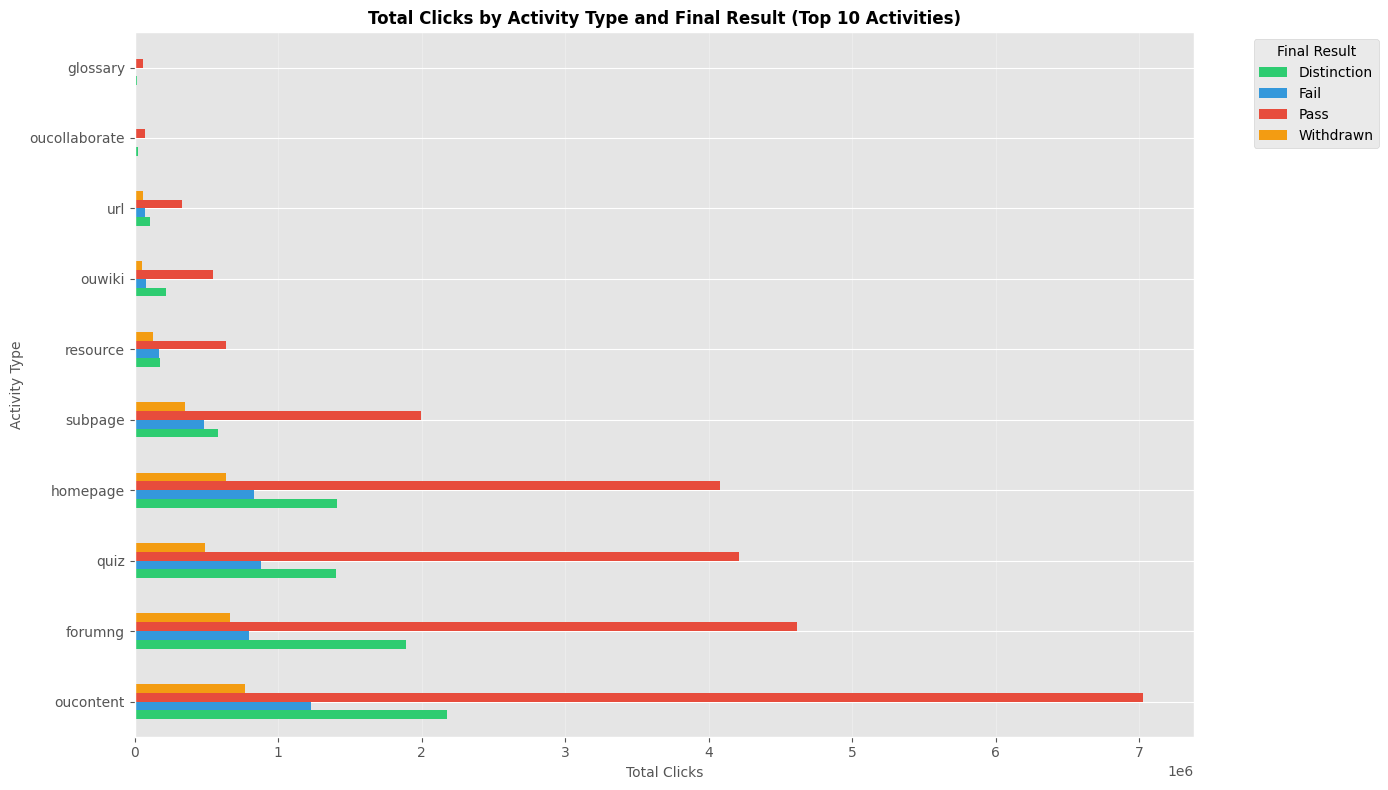

In [27]:
# Engagement by activity type
print("\n" + "=" * 80)
print("ENGAGEMENT BY ACTIVITY TYPE")
print("=" * 80)

# Merge VLE data with activity types
vle_engagement = student_vle_df.merge(
    vle_df[['id_site', 'activity_type']],
    on='id_site',
    how='left'
).merge(
    student_info_df[['code_module', 'code_presentation', 'id_student', 'final_result']],
    on=['code_module', 'code_presentation', 'id_student'],
    how='left'
)

# Clicks by activity type and final result
activity_engagement = vle_engagement.groupby(['activity_type', 'final_result'])['sum_click'].sum().unstack(fill_value=0)
print("\nTotal Clicks by Activity Type and Final Result:")
print(activity_engagement.head(10))

# Top 10 activity types
top_activities = vle_engagement.groupby('activity_type')['sum_click'].sum().nlargest(10).index
activity_engagement_top = activity_engagement.loc[top_activities]

fig, ax = plt.subplots(figsize=(14, 8))
activity_engagement_top.plot(kind='barh', ax=ax, color=['#2ecc71', '#3498db', '#e74c3c', '#f39c12'])
ax.set_title('Total Clicks by Activity Type and Final Result (Top 10 Activities)', fontsize=12, fontweight='bold')
ax.set_xlabel('Total Clicks', fontsize=10)
ax.set_ylabel('Activity Type', fontsize=10)
ax.legend(title='Final Result', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


## 4. Temporal Analysis

### 4.1 Registration Timeline Analysis


REGISTRATION TIMELINE ANALYSIS


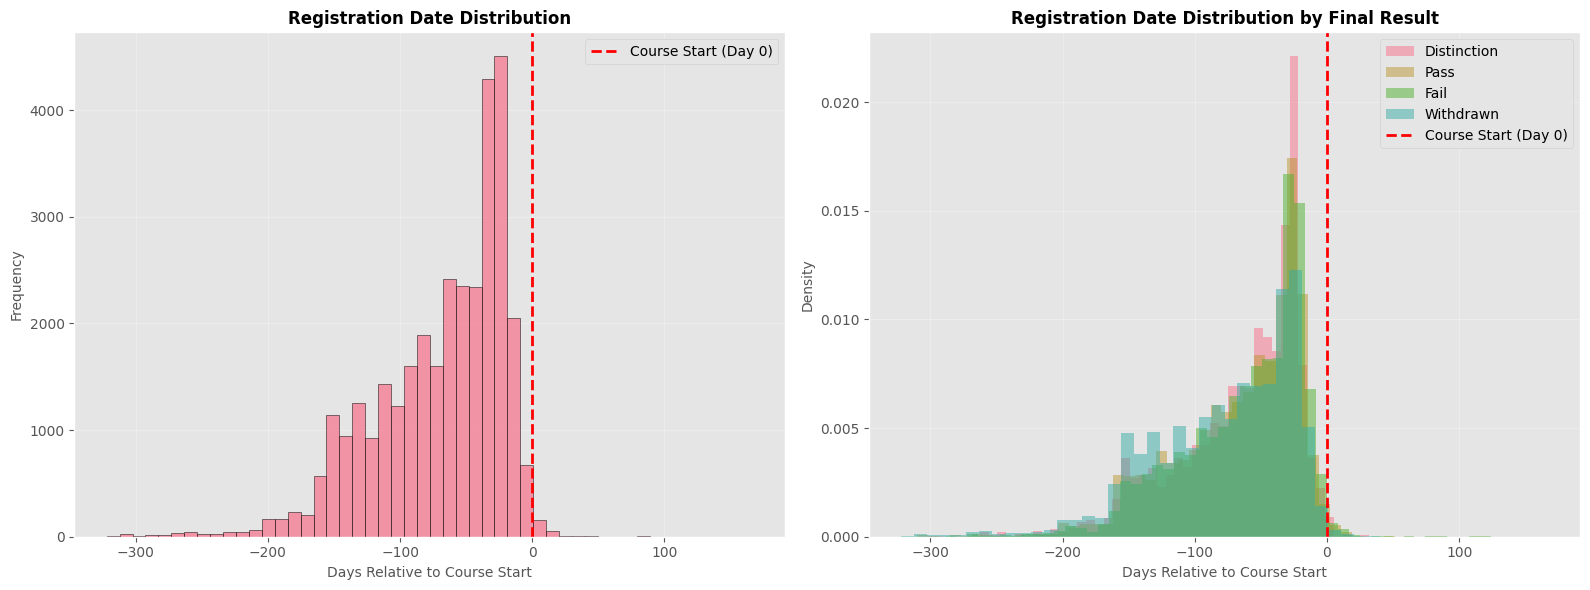

In [28]:
# Registration timeline analysis
print("=" * 80)
print("REGISTRATION TIMELINE ANALYSIS")
print("=" * 80)

# Registration date distribution
reg_dates_clean = reg_perf[reg_perf['date_registration'].notna()]['date_registration']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
axes[0].hist(reg_dates_clean, bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(0, color='red', linestyle='--', linewidth=2, label='Course Start (Day 0)')
axes[0].set_title('Registration Date Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Days Relative to Course Start', fontsize=10)
axes[0].set_ylabel('Frequency', fontsize=10)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Registration by final result
for result in ['Distinction', 'Pass', 'Fail', 'Withdrawn']:
    data = reg_perf[(reg_perf['final_result'] == result) & 
                    (reg_perf['date_registration'].notna())]['date_registration']
    axes[1].hist(data, bins=50, alpha=0.5, label=result, density=True)
axes[1].axvline(0, color='red', linestyle='--', linewidth=2, label='Course Start (Day 0)')
axes[1].set_title('Registration Date Distribution by Final Result', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Days Relative to Course Start', fontsize=10)
axes[1].set_ylabel('Density', fontsize=10)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


### 4.2 VLE Engagement Timeline Analysis


VLE ENGAGEMENT TIMELINE ANALYSIS


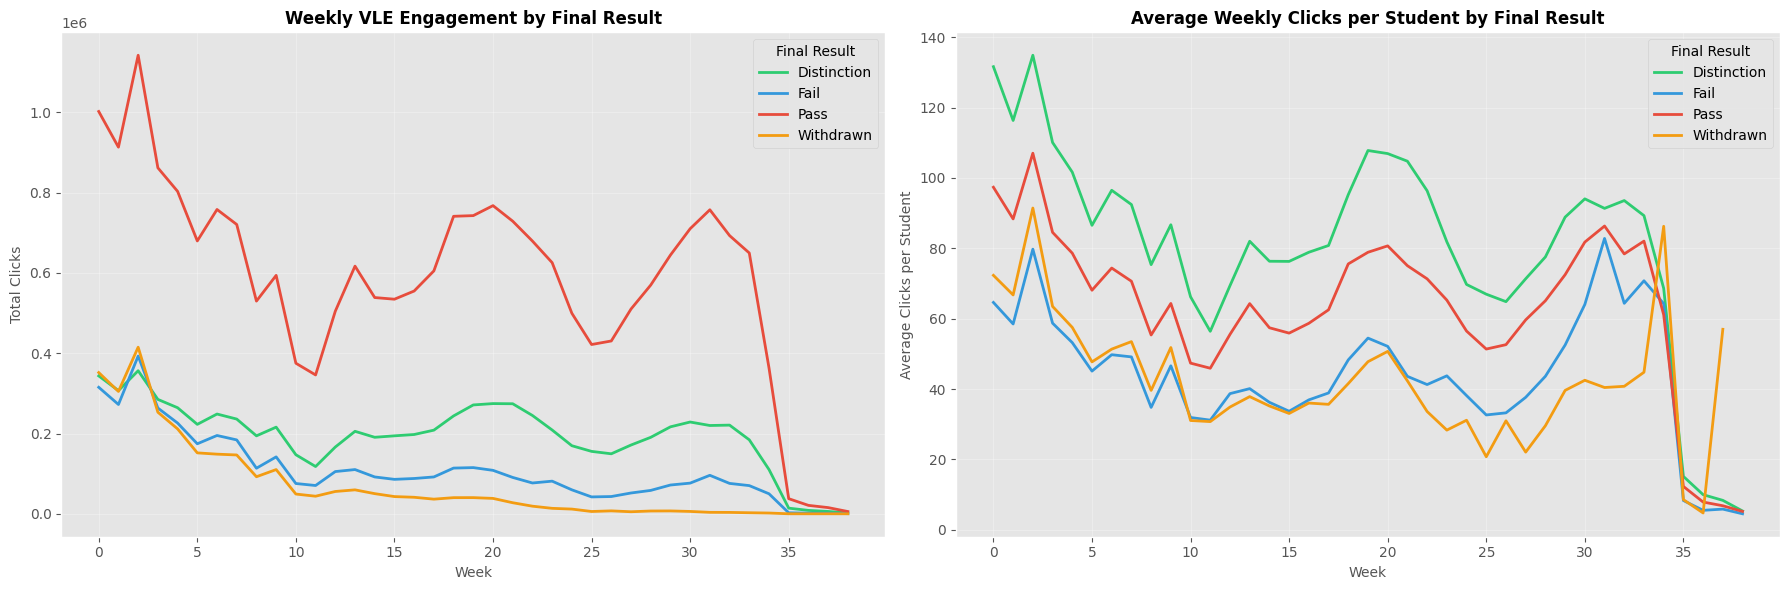

In [29]:
# VLE engagement timeline analysis
print("=" * 80)
print("VLE ENGAGEMENT TIMELINE ANALYSIS")
print("=" * 80)

# Calculate weekly engagement
vle_timeline = student_vle_df.merge(
    student_info_df[['code_module', 'code_presentation', 'id_student', 'final_result']],
    on=['code_module', 'code_presentation', 'id_student'],
    how='left'
)

# Convert date to week (assuming course starts at day 0)
vle_timeline['week'] = (vle_timeline['date'] // 7).astype(int)

# Weekly engagement by final result
weekly_engagement = vle_timeline.groupby(['week', 'final_result'])['sum_click'].sum().unstack(fill_value=0)

# Filter to reasonable week range (0-40 weeks)
weekly_engagement = weekly_engagement[(weekly_engagement.index >= 0) & (weekly_engagement.index <= 40)]

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Total clicks per week
weekly_engagement.plot(ax=axes[0], color=['#2ecc71', '#3498db', '#e74c3c', '#f39c12'], linewidth=2)
axes[0].set_title('Weekly VLE Engagement by Final Result', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Week', fontsize=10)
axes[0].set_ylabel('Total Clicks', fontsize=10)
axes[0].legend(title='Final Result')
axes[0].grid(alpha=0.3)

# Average clicks per student per week
weekly_engagement_avg = vle_timeline.groupby(['week', 'final_result']).agg({
    'sum_click': 'sum',
    'id_student': 'nunique'
}).reset_index()
weekly_engagement_avg['avg_clicks_per_student'] = weekly_engagement_avg['sum_click'] / weekly_engagement_avg['id_student']
weekly_engagement_avg_pivot = weekly_engagement_avg.pivot(index='week', columns='final_result', values='avg_clicks_per_student')
weekly_engagement_avg_pivot = weekly_engagement_avg_pivot[(weekly_engagement_avg_pivot.index >= 0) & 
                                                           (weekly_engagement_avg_pivot.index <= 40)]

weekly_engagement_avg_pivot.plot(ax=axes[1], color=['#2ecc71', '#3498db', '#e74c3c', '#f39c12'], linewidth=2)
axes[1].set_title('Average Weekly Clicks per Student by Final Result', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Week', fontsize=10)
axes[1].set_ylabel('Average Clicks per Student', fontsize=10)
axes[1].legend(title='Final Result')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


## 5. Key Insights and Summary


In [30]:
# Key insights summary
print("=" * 80)
print("KEY INSIGHTS SUMMARY")
print("=" * 80)

# 1. Overall performance
print("\n1. OVERALL PERFORMANCE:")
result_summary = student_info_df['final_result'].value_counts(normalize=True) * 100
for result, pct in result_summary.items():
    print(f"   {result:12s}: {pct:5.2f}%")

# 2. Module performance
print("\n2. MODULE PERFORMANCE (Pass Rate):")
module_pass_rates = student_info_df.groupby('code_module').apply(
    lambda x: (x['final_result'].isin(['Pass', 'Distinction']).sum() / len(x)) * 100
).sort_values(ascending=False)
for module, rate in module_pass_rates.items():
    print(f"   {module}: {rate:5.2f}%")

# 3. Demographics insights
print("\n3. DEMOGRAPHICS INSIGHTS:")
# Gender
gender_pass = student_info_df.groupby('gender').apply(
    lambda x: (x['final_result'].isin(['Pass', 'Distinction']).sum() / len(x)) * 100
)
print(f"   Gender Pass Rates:")
for gender, rate in gender_pass.items():
    print(f"      {gender}: {rate:5.2f}%")

# Age
age_pass = student_info_df.groupby('age_band').apply(
    lambda x: (x['final_result'].isin(['Pass', 'Distinction']).sum() / len(x)) * 100
).sort_values(ascending=False)
print(f"   Age Band Pass Rates (Top 3):")
for age, rate in age_pass.head(3).items():
    print(f"      {age}: {rate:5.2f}%")

# 4. Engagement insights
print("\n4. ENGAGEMENT INSIGHTS:")
if 'student_engagement' in locals():
    engagement_pass = student_engagement.groupby('final_result')['total_clicks'].mean()
    print(f"   Average Total Clicks by Result:")
    for result, clicks in engagement_pass.items():
        print(f"      {result:12s}: {clicks:>10,.0f} clicks")

# 5. Registration insights
print("\n5. REGISTRATION INSIGHTS:")
if 'reg_perf' in locals():
    early_reg = reg_perf[reg_perf['date_registration'] < -30]
    early_reg_pass = (early_reg['final_result'].isin(['Pass', 'Distinction']).sum() / len(early_reg)) * 100
    print(f"   Early Registration (30+ days before): {early_reg_pass:.2f}% pass rate")
    
    late_reg = reg_perf[(reg_perf['date_registration'] >= 0) & (reg_perf['date_registration'].notna())]
    if len(late_reg) > 0:
        late_reg_pass = (late_reg['final_result'].isin(['Pass', 'Distinction']).sum() / len(late_reg)) * 100
        print(f"   Late Registration (after start): {late_reg_pass:.2f}% pass rate")

print("\n" + "=" * 80)
print("EDA COMPLETE")
print("=" * 80)


KEY INSIGHTS SUMMARY

1. OVERALL PERFORMANCE:
   Pass        : 37.93%
   Withdrawn   : 31.16%
   Fail        : 21.64%
   Distinction :  9.28%

2. MODULE PERFORMANCE (Pass Rate):
   AAA: 70.99%
   GGG: 59.75%
   EEE: 56.24%
   BBB: 47.46%
   FFF: 47.00%
   DDD: 41.61%
   CCC: 37.84%

3. DEMOGRAPHICS INSIGHTS:
   Gender Pass Rates:
      F: 48.44%
      M: 46.19%
   Age Band Pass Rates (Top 3):
      55<=: 61.57%
      35-55: 52.16%
      0-35: 45.03%

4. ENGAGEMENT INSIGHTS:
   Average Total Clicks by Result:
      Distinction :      2,667 clicks
      Fail        :        688 clicks
      Pass        :      1,922 clicks
      Withdrawn   :        445 clicks

5. REGISTRATION INSIGHTS:
   Early Registration (30+ days before): 46.54% pass rate
   Late Registration (after start): 50.85% pass rate

EDA COMPLETE
